In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

### Read Data

In [5]:
data=pd.read_csv("D:\AI Theory\Cancer\Breast_Cancer_Detection\data\data.csv") #Do đang sử dụng local nên nhớ thay đổi lại đường dẫn

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.isna().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
for feature in data.columns:
    print({feature: data[feature].nunique()})

{'id': 569}
{'diagnosis': 2}
{'radius_mean': 456}
{'texture_mean': 479}
{'perimeter_mean': 522}
{'area_mean': 539}
{'smoothness_mean': 474}
{'compactness_mean': 537}
{'concavity_mean': 537}
{'concave points_mean': 542}
{'symmetry_mean': 432}
{'fractal_dimension_mean': 499}
{'radius_se': 540}
{'texture_se': 519}
{'perimeter_se': 533}
{'area_se': 528}
{'smoothness_se': 547}
{'compactness_se': 541}
{'concavity_se': 533}
{'concave points_se': 507}
{'symmetry_se': 498}
{'fractal_dimension_se': 545}
{'radius_worst': 457}
{'texture_worst': 511}
{'perimeter_worst': 514}
{'area_worst': 544}
{'smoothness_worst': 411}
{'compactness_worst': 529}
{'concavity_worst': 539}
{'concave points_worst': 492}
{'symmetry_worst': 500}
{'fractal_dimension_worst': 535}
{'Unnamed: 32': 0}


### Data Cleaning

In [27]:
data.drop(['id','Unnamed: 32'],axis=1, inplace=True)

In [28]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
print(data)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

In [29]:
data.duplicated().any()

False

In [30]:
# Kiểm tra data có bị lặp
data.isna()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        False        False         False           False      False   
1        False        False         False           False      False   
2        False        False         False           False      False   
3        False        False         False           False      False   
4        False        False         False           False      False   
..         ...          ...           ...             ...        ...   
564      False        False         False           False      False   
565      False        False         False           False      False   
566      False        False         False           False      False   
567      False        False         False           False      False   
568      False        False         False           False      False   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0              False             False           False                False   
1              False             False           False                False   
2              False             False           False                False   
3              False             False           False                False   
4              False             False           False                False   
..               ...               ...             ...                  ...   
564            False             False           False                False   
565            False             False           False                False   
566            False             False           False                False   
567            False             False           False                False   
568            False             False           False                False   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0            False  ...         False          False            False   
1            False  ...         False          False            False   
2            False  ...         False          False            False   
3            False  ...         False          False            False   
4            False  ...         False          False            False   
..             ...  ...           ...            ...              ...   
564          False  ...         False          False            False   
565          False  ...         False          False            False   
566          False  ...         False          False            False   
567          False  ...         False          False            False   
568          False  ...         False          False            False   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0         False             False              False            False   
1         False             False              False            False   
2         False             False              False            False   
3         False             False              False            False   
4         False             False              False            False   
..          ...               ...                ...              ...   
564       False             False              False            False   
565       False             False              False            False   
566       False             False              False            False   
567       False             False              False            False   
568       False             False              False            False   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                   False           False                    False  
1                   False           False                    False  
2                   False           False                    False  
3                   False           False                    False  
4                   False           False                    False  
..                    .

In [31]:
# Xóa các dòng bị lập
data.drop_duplicates()
print(data)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

In [32]:
#Tính toán các thống kê mô tả
data.describe().T

count        mean         std         min  \
diagnosis                569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
diagnosis                  0.000000    0.000000     1.000000     1.00000  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.72000

In [33]:
# đếm sô lượng outlier
def count_outliers(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  return len(outliers)

In [34]:
for col in data.select_dtypes(include=np.number).columns:
    print("{:<25} {:>6}".format(col, count_outliers(data, col)))

diagnosis                      0
radius_mean                   14
texture_mean                   7
perimeter_mean                13
area_mean                     25
smoothness_mean                6
compactness_mean              16
concavity_mean                18
concave points_mean           10
symmetry_mean                 15
fractal_dimension_mean        15
radius_se                     38
texture_se                    20
perimeter_se                  38
area_se                       65
smoothness_se                 30
compactness_se                28
concavity_se                  22
concave points_se             19
symmetry_se                   27
fractal_dimension_se          28
radius_worst                  17
texture_worst                  5
perimeter_worst               15
area_worst                    35
smoothness_worst               7
compactness_worst             16
concavity_worst               12
concave points_worst           0
symmetry_worst                23
fractal_di

In [11]:
sns.set(style="whitegrid")
colors=['#606676', '#CDC2A5']

palette={'0': colors[0], '1': colors[1]}

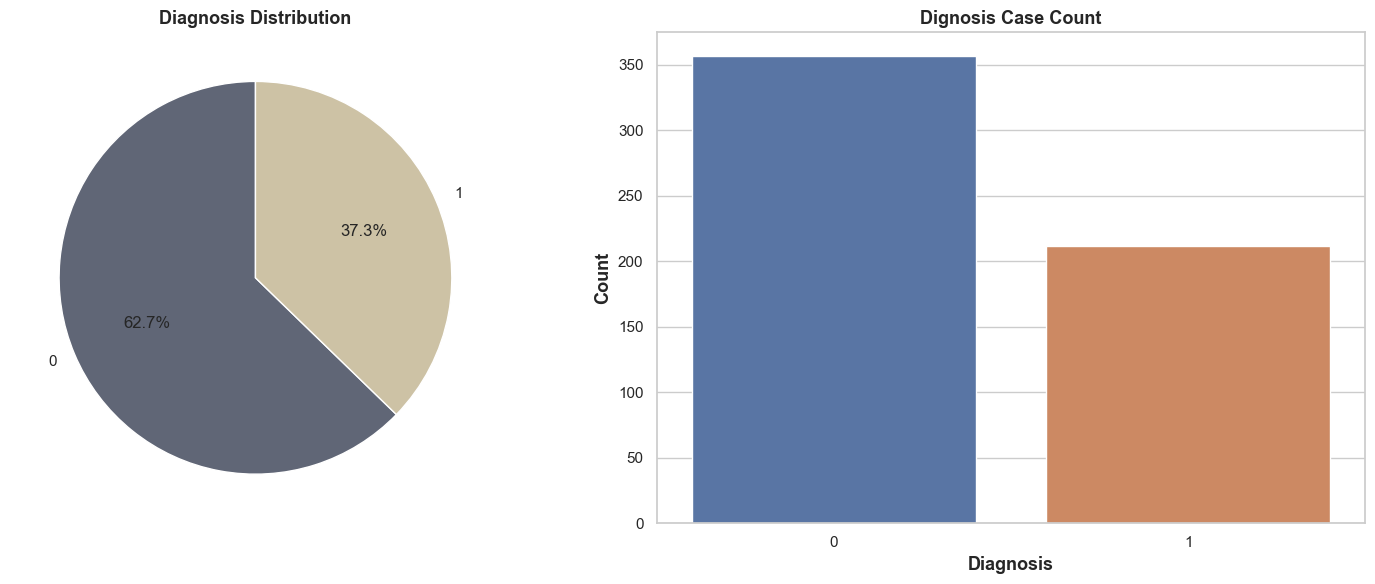

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].pie(data['diagnosis'].value_counts(), labels=data['diagnosis'].value_counts().index,
           autopct='%1.1f%%',startangle=90, colors=colors)
axs[0].set_title('Diagnosis Distribution', fontsize = 13, fontweight = 'bold')


sns.countplot(x='diagnosis', data=data, ax=axs[1])
axs[1].set_title('Dignosis Case Count', fontsize = 13, fontweight = 'bold')
axs[1].set_xlabel('Diagnosis', fontsize = 13, fontweight = 'bold')
axs[1].set_ylabel('Count', fontsize = 13, fontweight = 'bold')

plt.tight_layout()
plt.show()

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

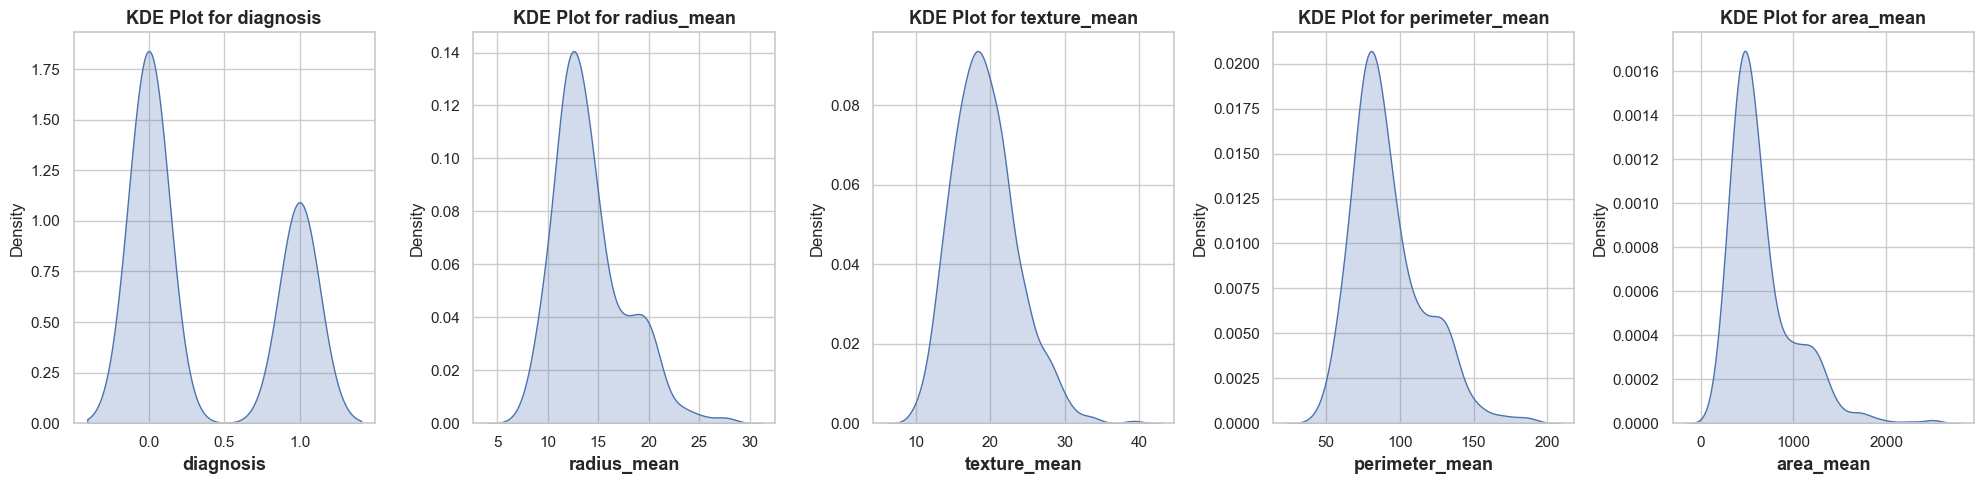

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

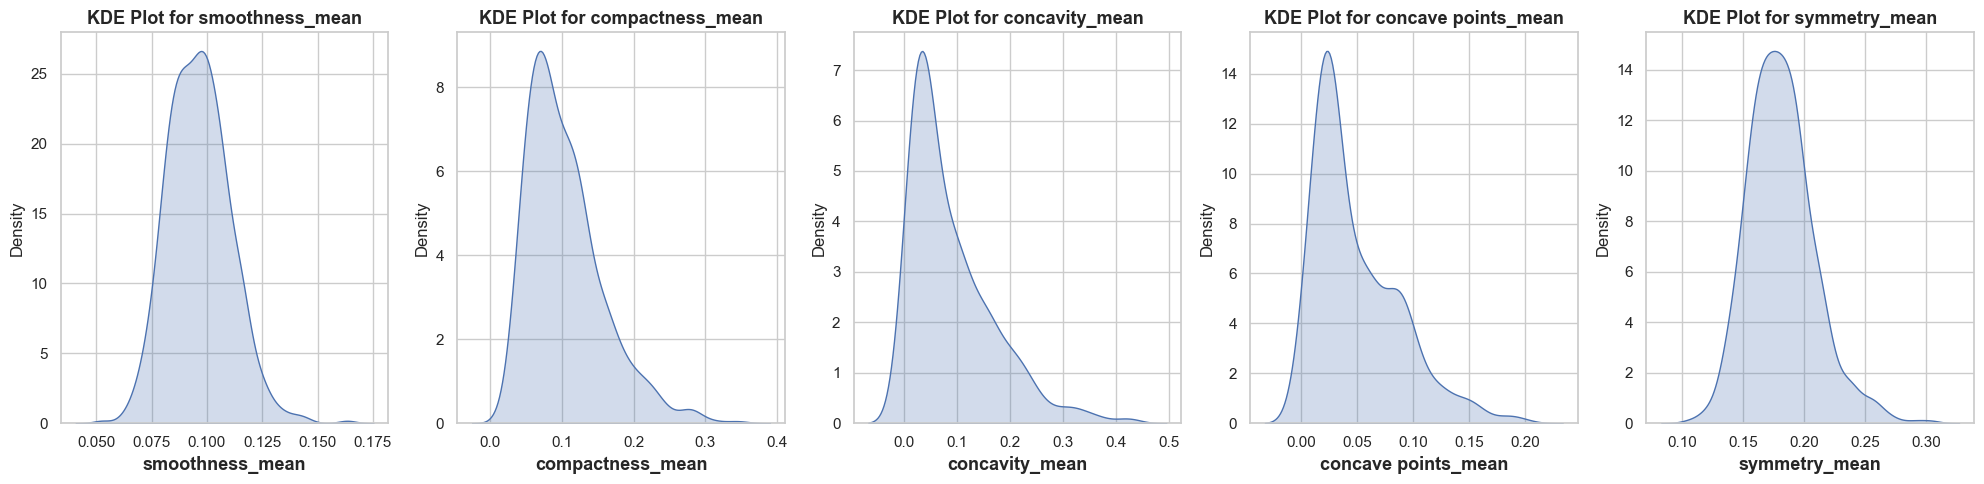

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

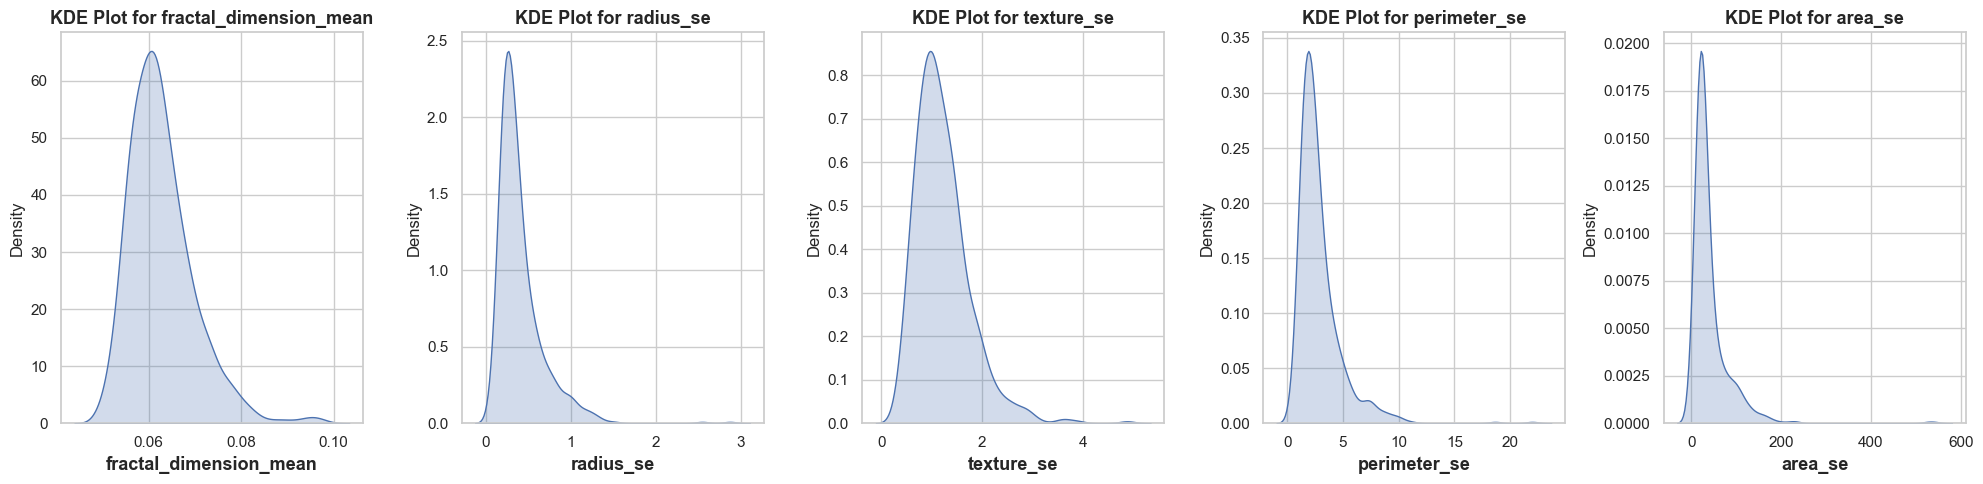

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

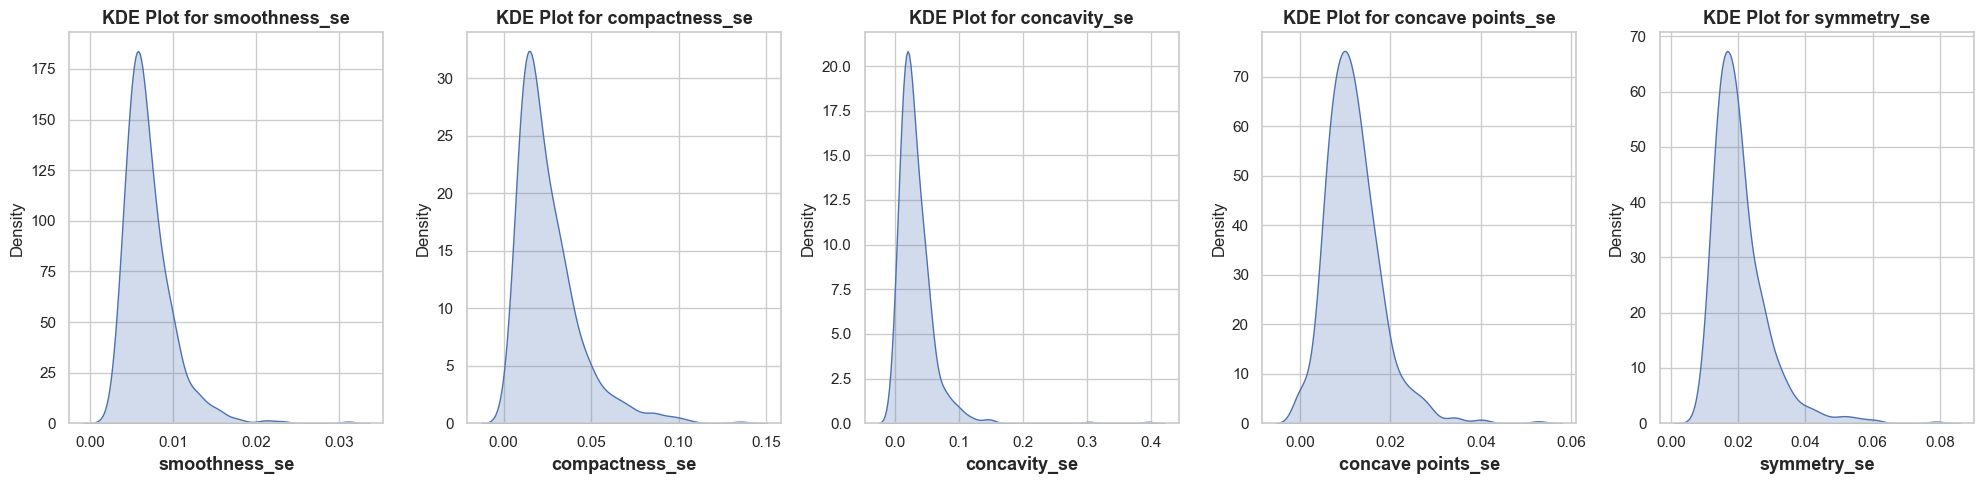

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

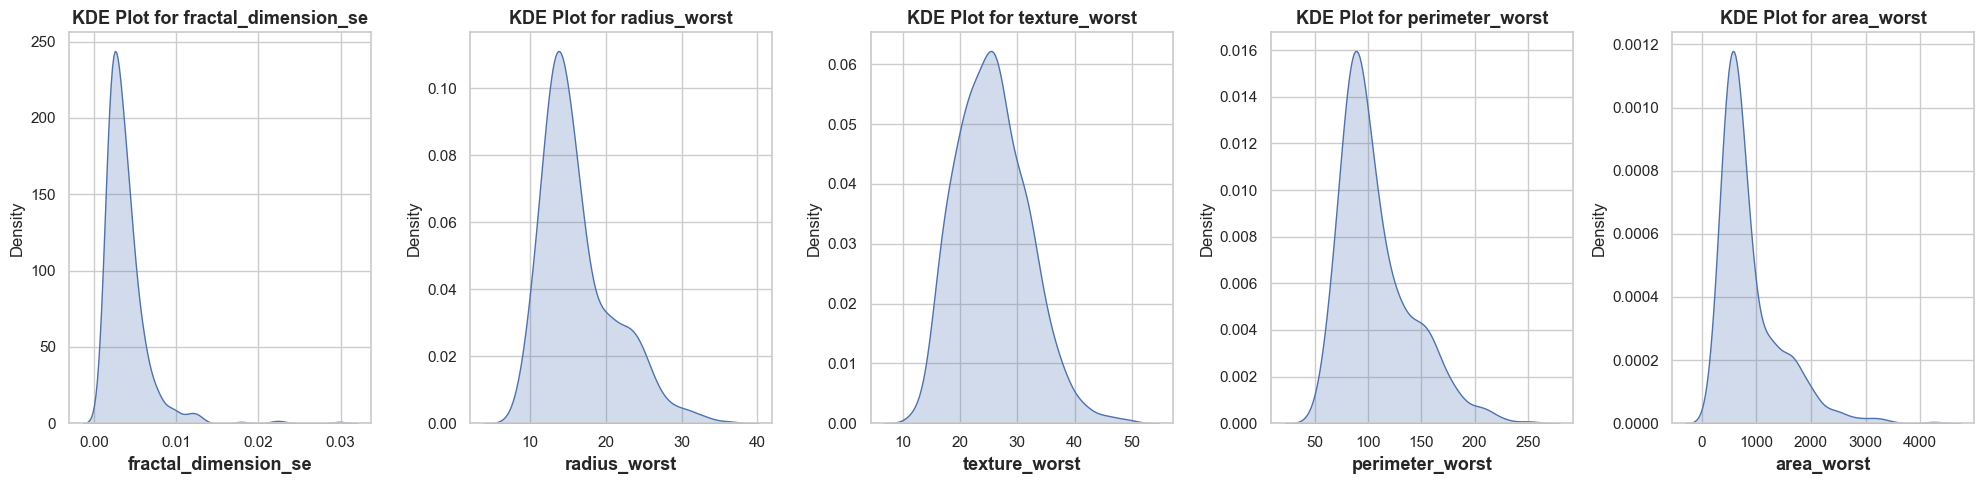

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

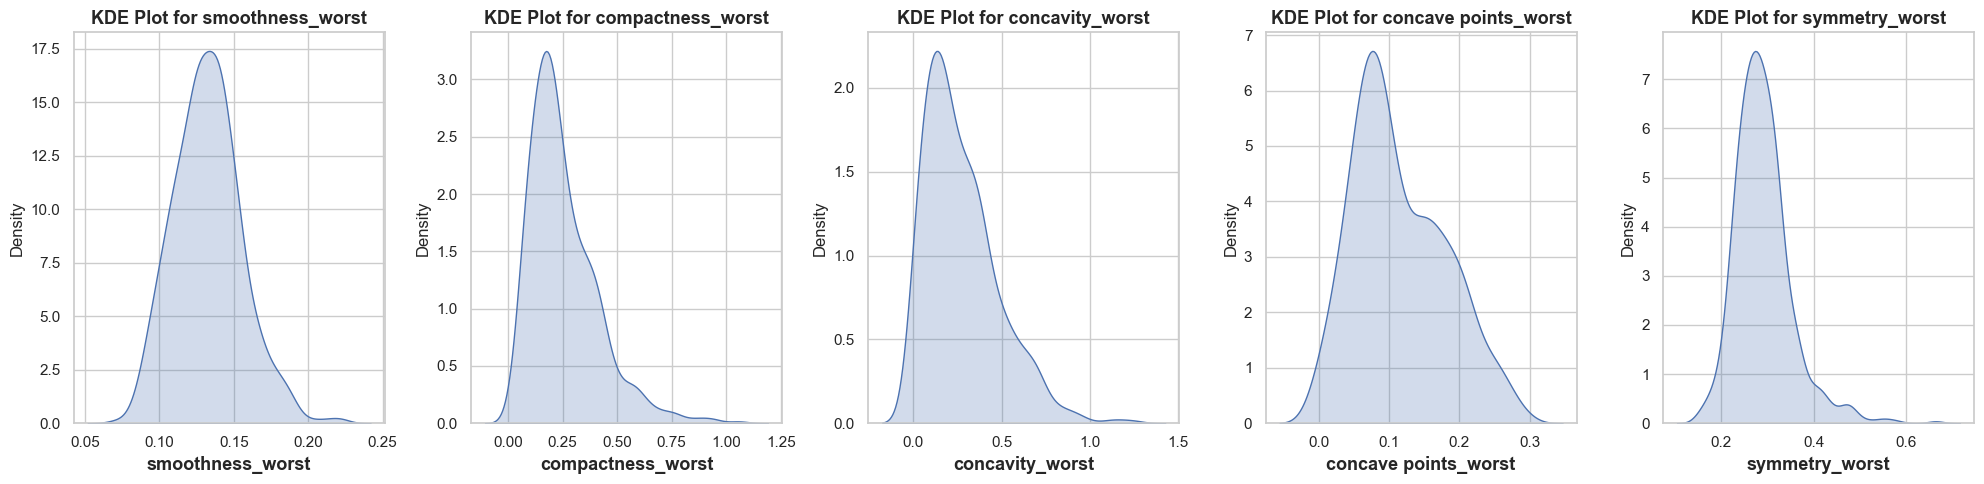

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


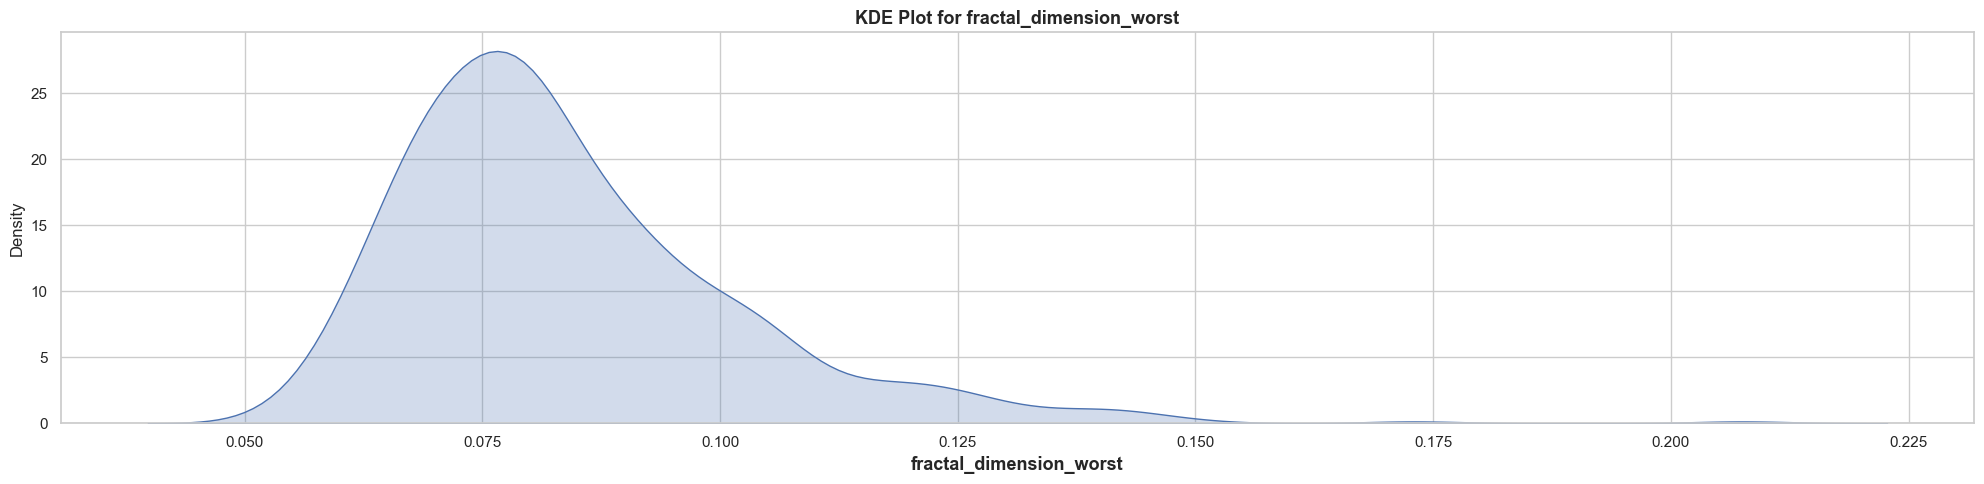

In [12]:
features = data.select_dtypes(exclude=['object'])

num_cols_groups = [features.columns[i:i+5] for i in range(0, len(features.columns), 5)]

for cols_group in num_cols_groups:
    fig, axs = plt.subplots(1, len(cols_group), figsize=(20, 5))

    if len(cols_group) == 1:
        axs = [axs]
    for i, col in enumerate(cols_group):
        sns.kdeplot(data[col], ax=axs[i], fill = True)
        axs[i].set_title(f'KDE Plot for {col}', fontsize = 13, fontweight = 'bold')
        axs[i].set_xlabel(col, fontsize = 13, fontweight = 'bold')

    plt.tight_layout()
    plt.show()

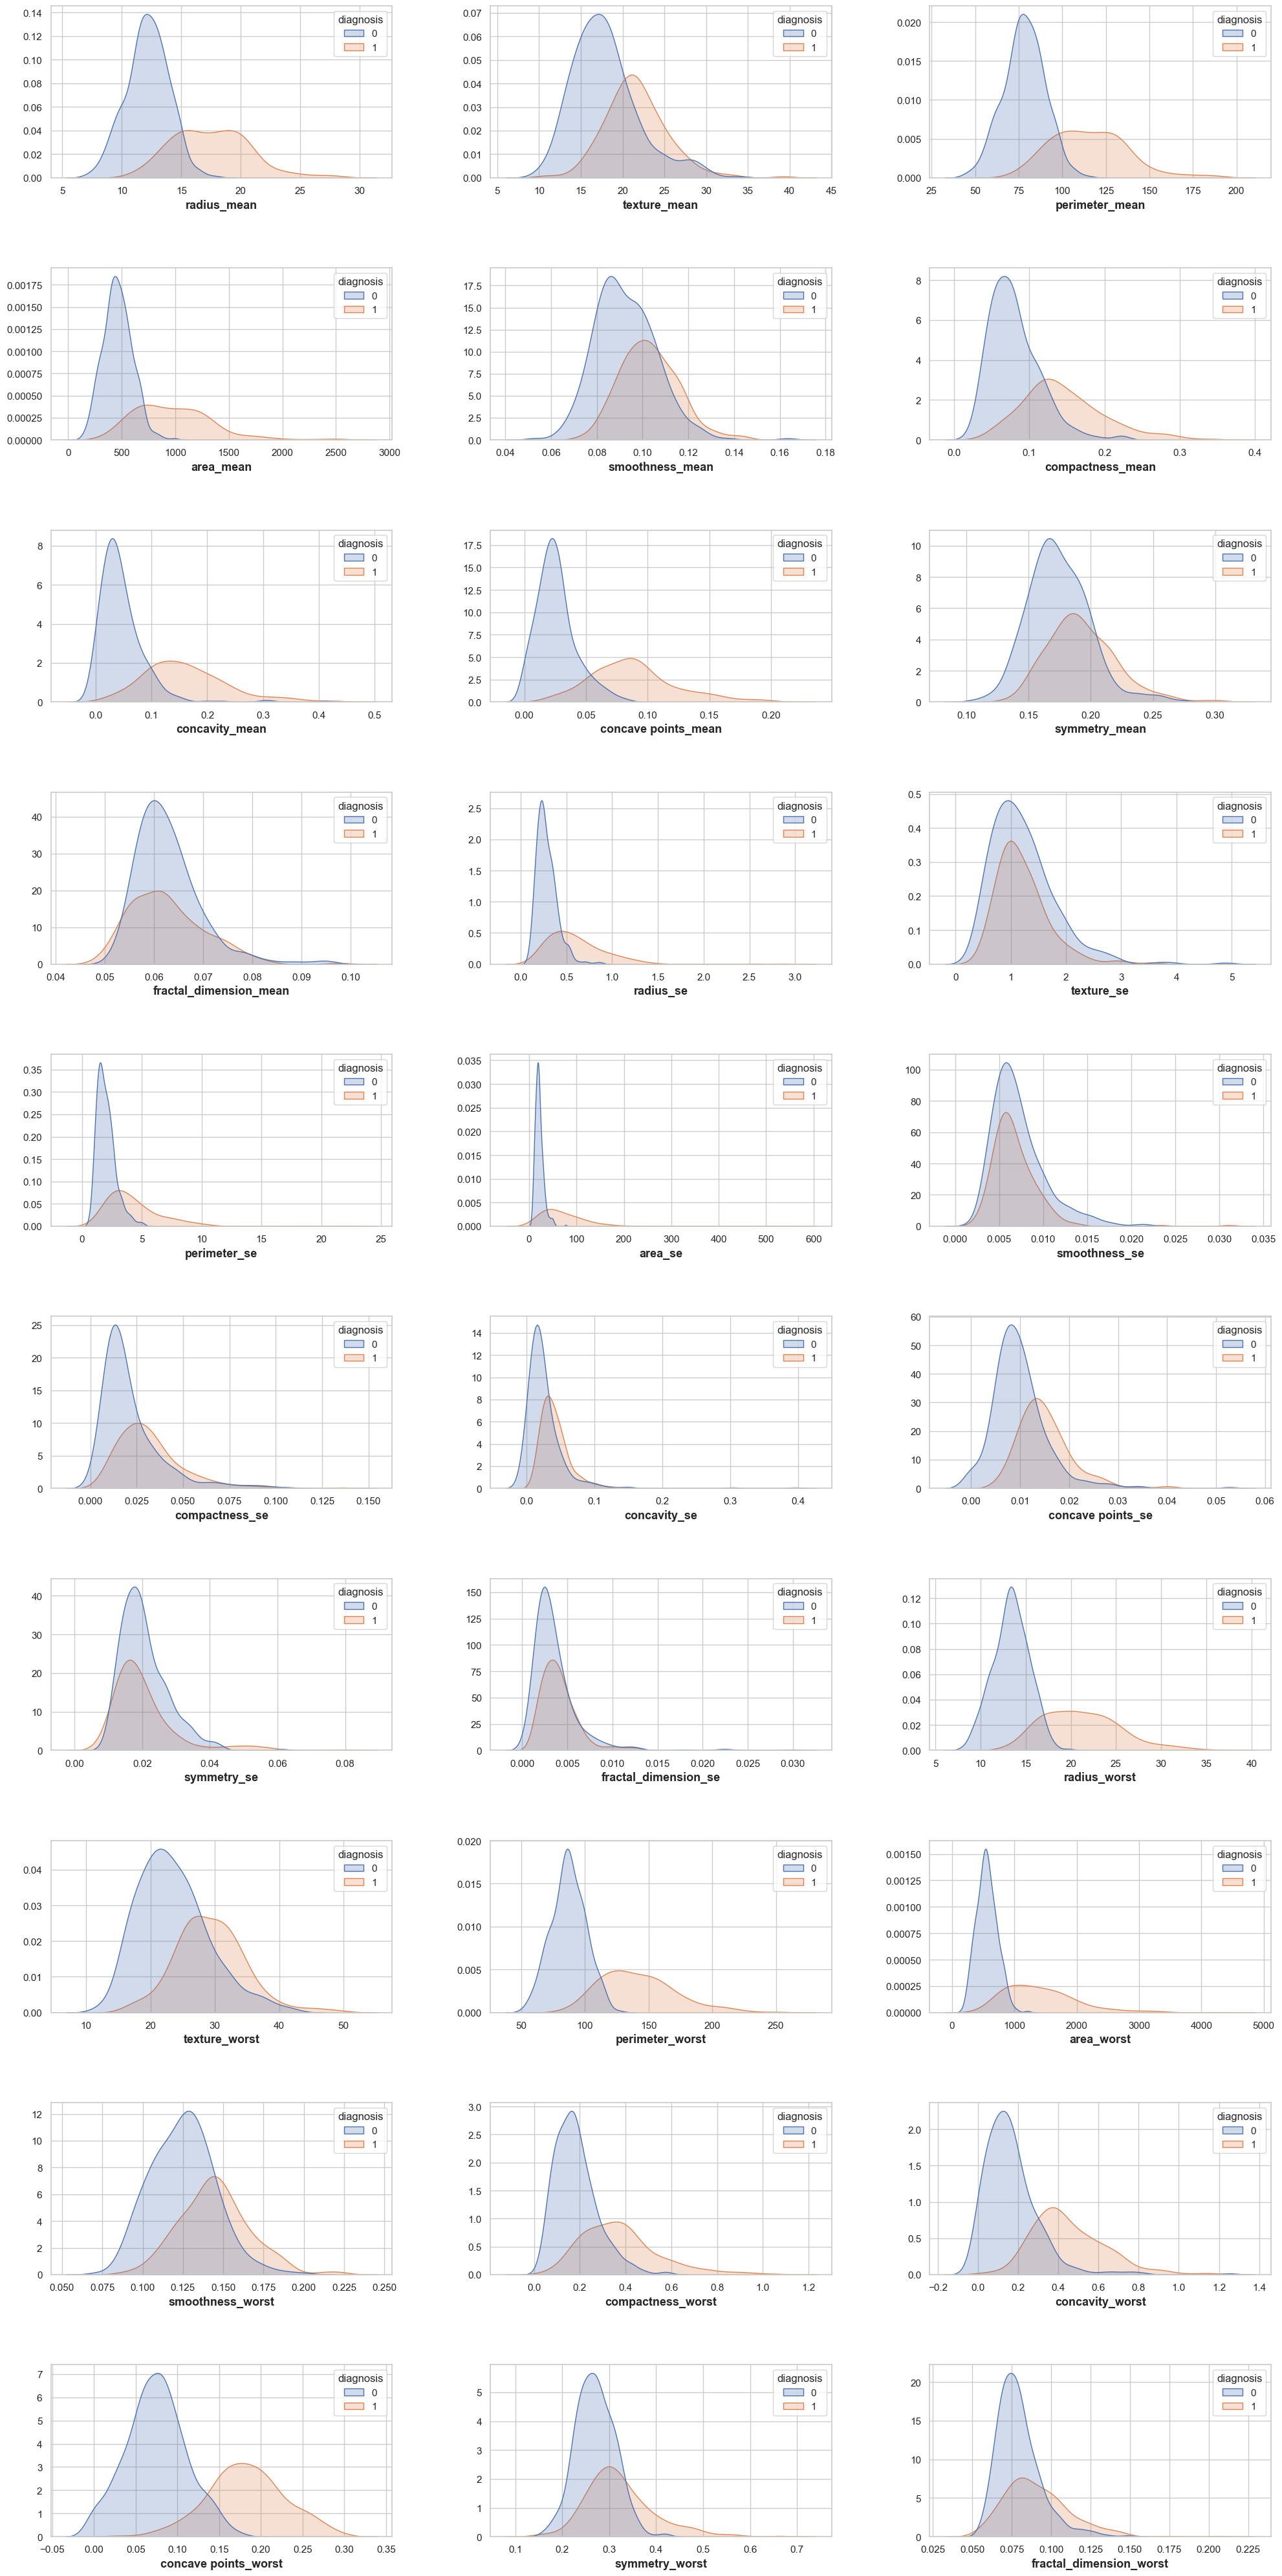

In [ ]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(data.columns[1:]):
    sns.kdeplot(x=col, data=data, ax=ax[i], fill=True, hue = 'diagnosis')
    ax[i].set_xlabel(col, fontsize = 13, fontweight = 'bold')
    ax[i].set_ylabel('')

plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

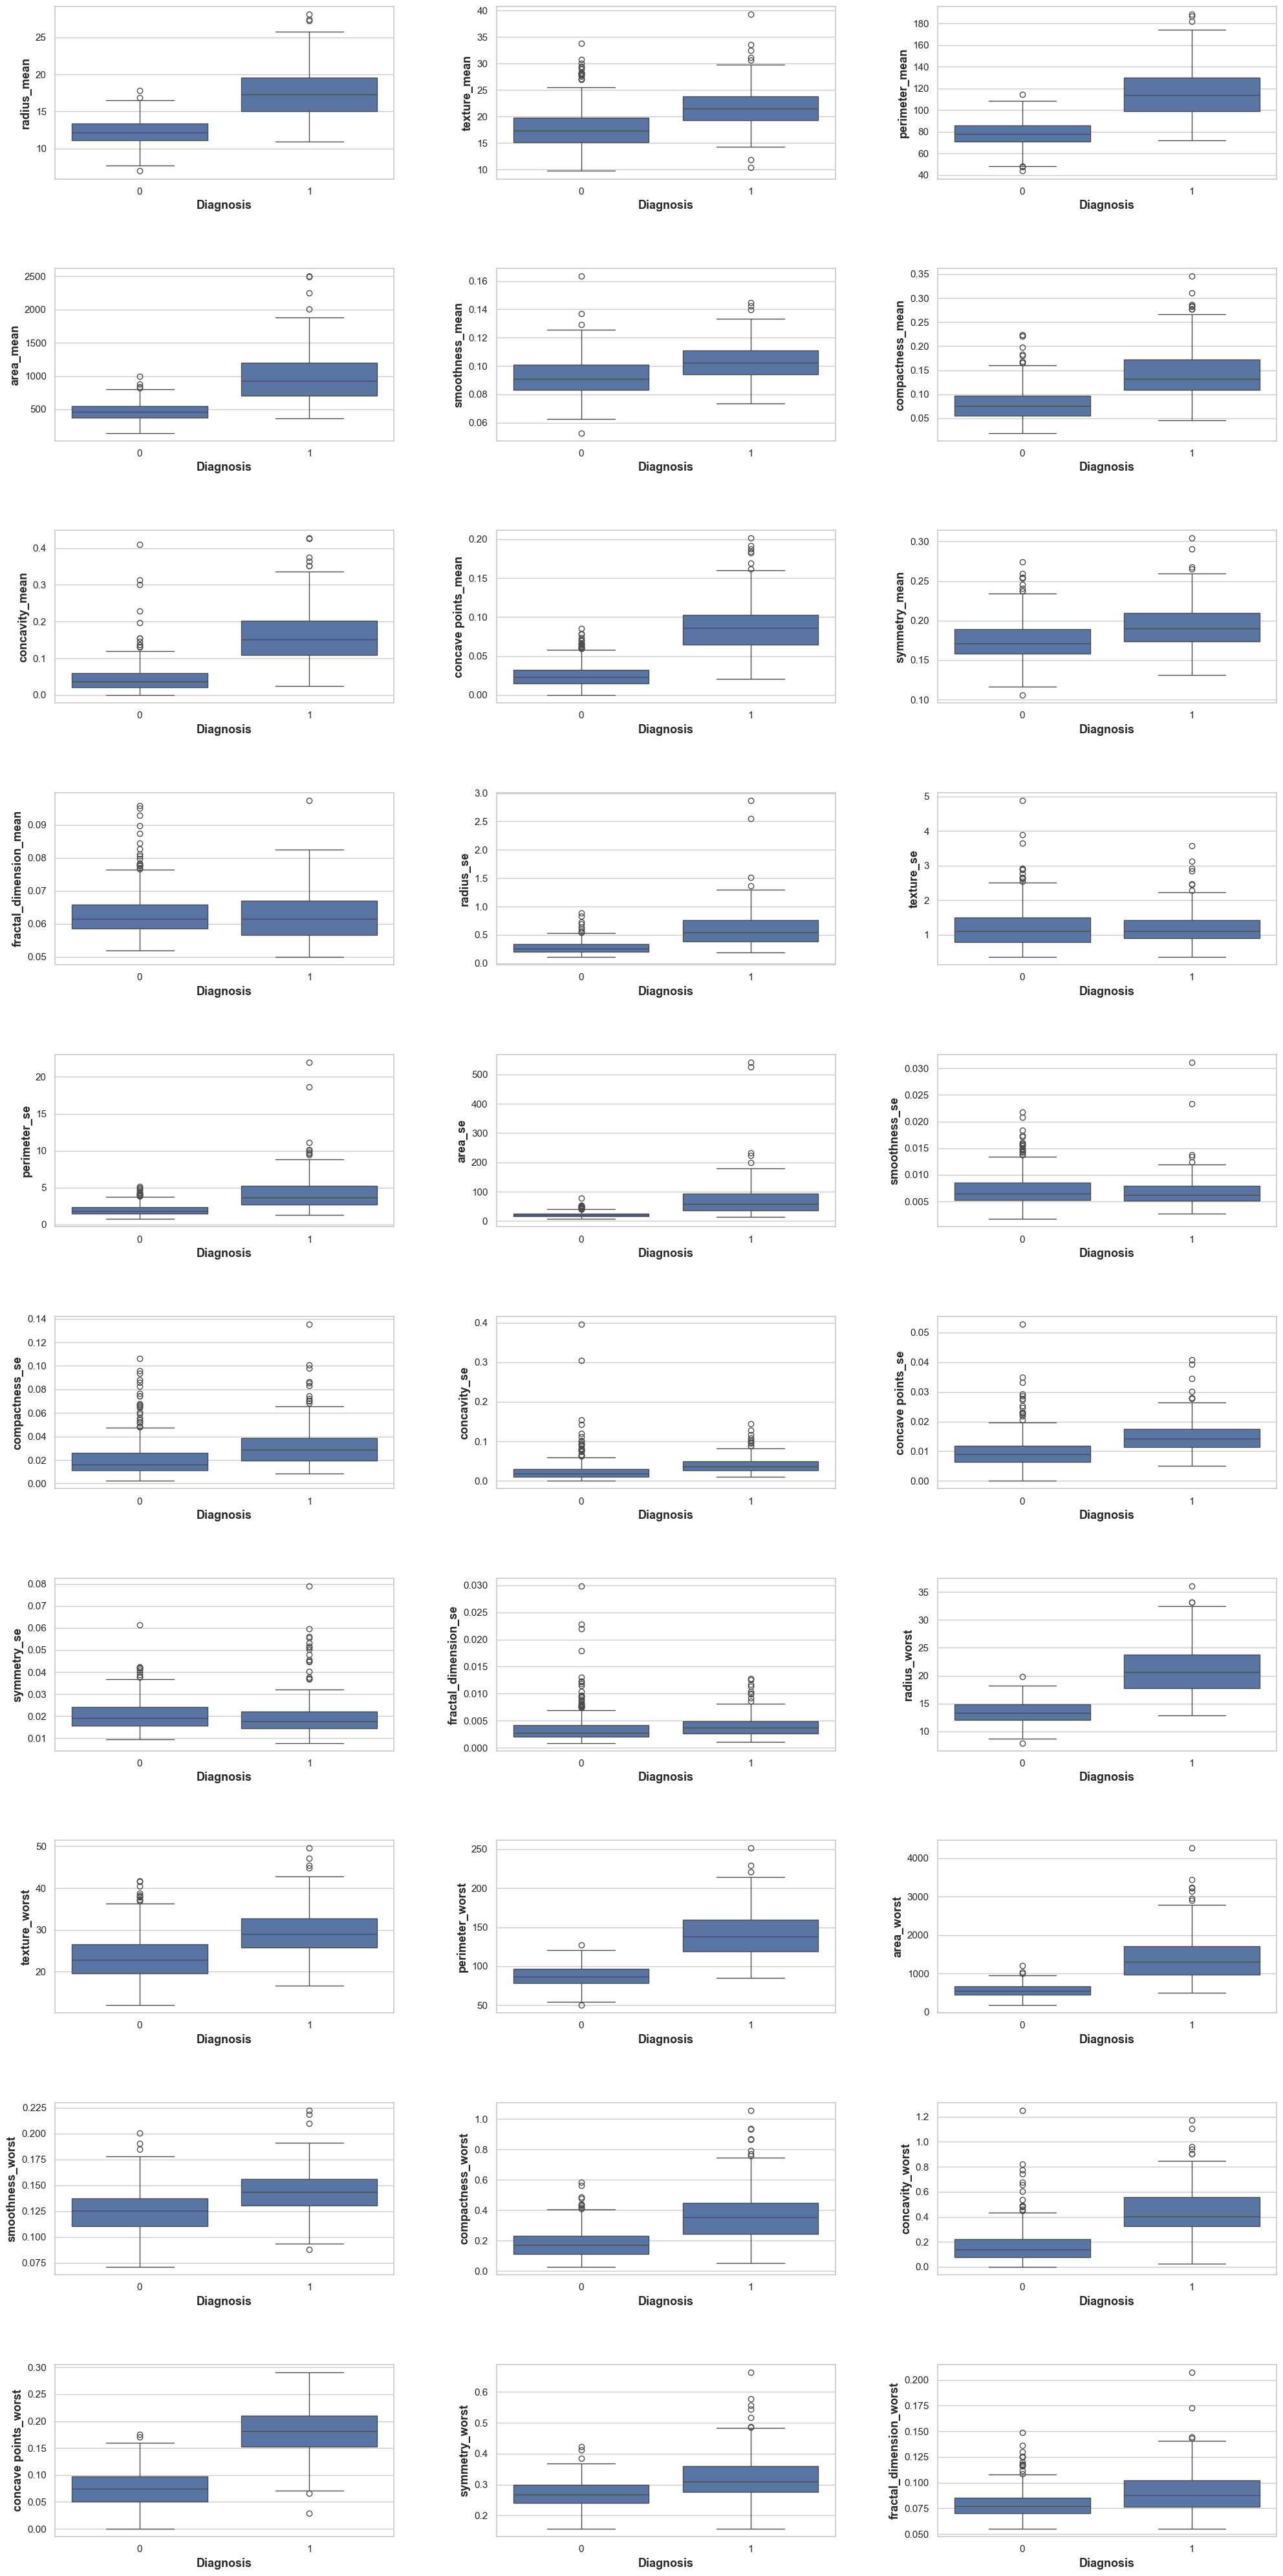

In [16]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(data.columns[1:]):
    sns.boxplot(x='diagnosis', y=col, data=data, ax=ax[i])
    ax[i].set_xlabel('Diagnosis', fontsize = 13, fontweight = 'bold')
    ax[i].set_ylabel(col, fontsize = 13, fontweight = 'bold')

plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

In [35]:
data.select_dtypes(include='number')

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

d:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


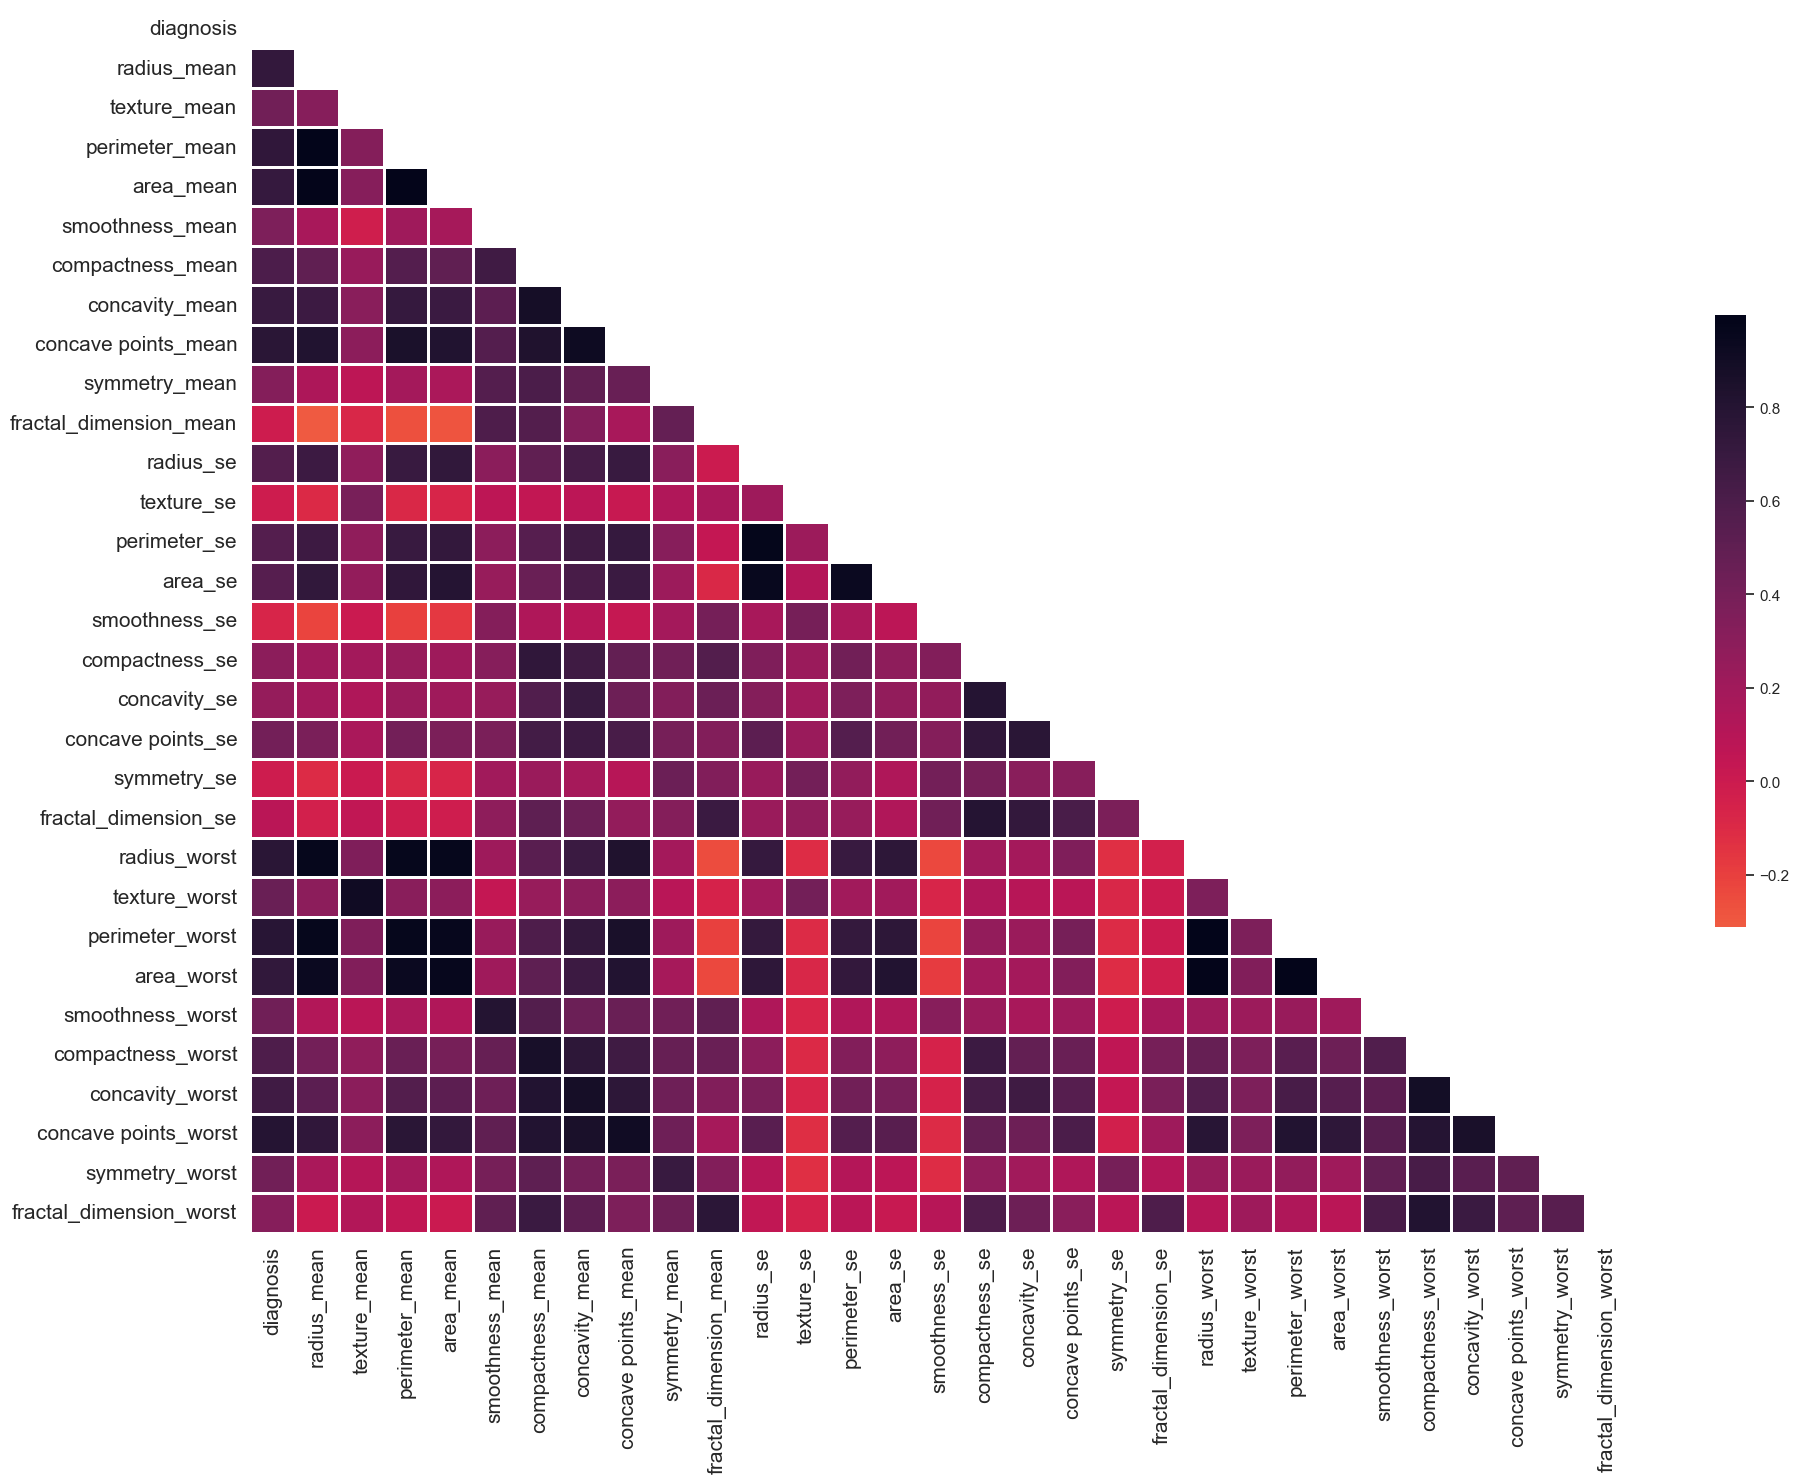

In [36]:
sns.set_theme(style="white")

plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(data.select_dtypes(include="number").corr(), dtype=bool))
ax = sns.heatmap(data.select_dtypes(include="number").corr(), annot=True, cmap='rocket_r', fmt='.2f',
            linewidths=1, linecolor='white', mask=mask, center=0, cbar_kws={"shrink": .5})

for label in ax.get_yticklabels():
    label.set_size(15)

for label in ax.get_xticklabels():
    label.set_size(15)

plt.tight_layout()
plt.show()

d:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


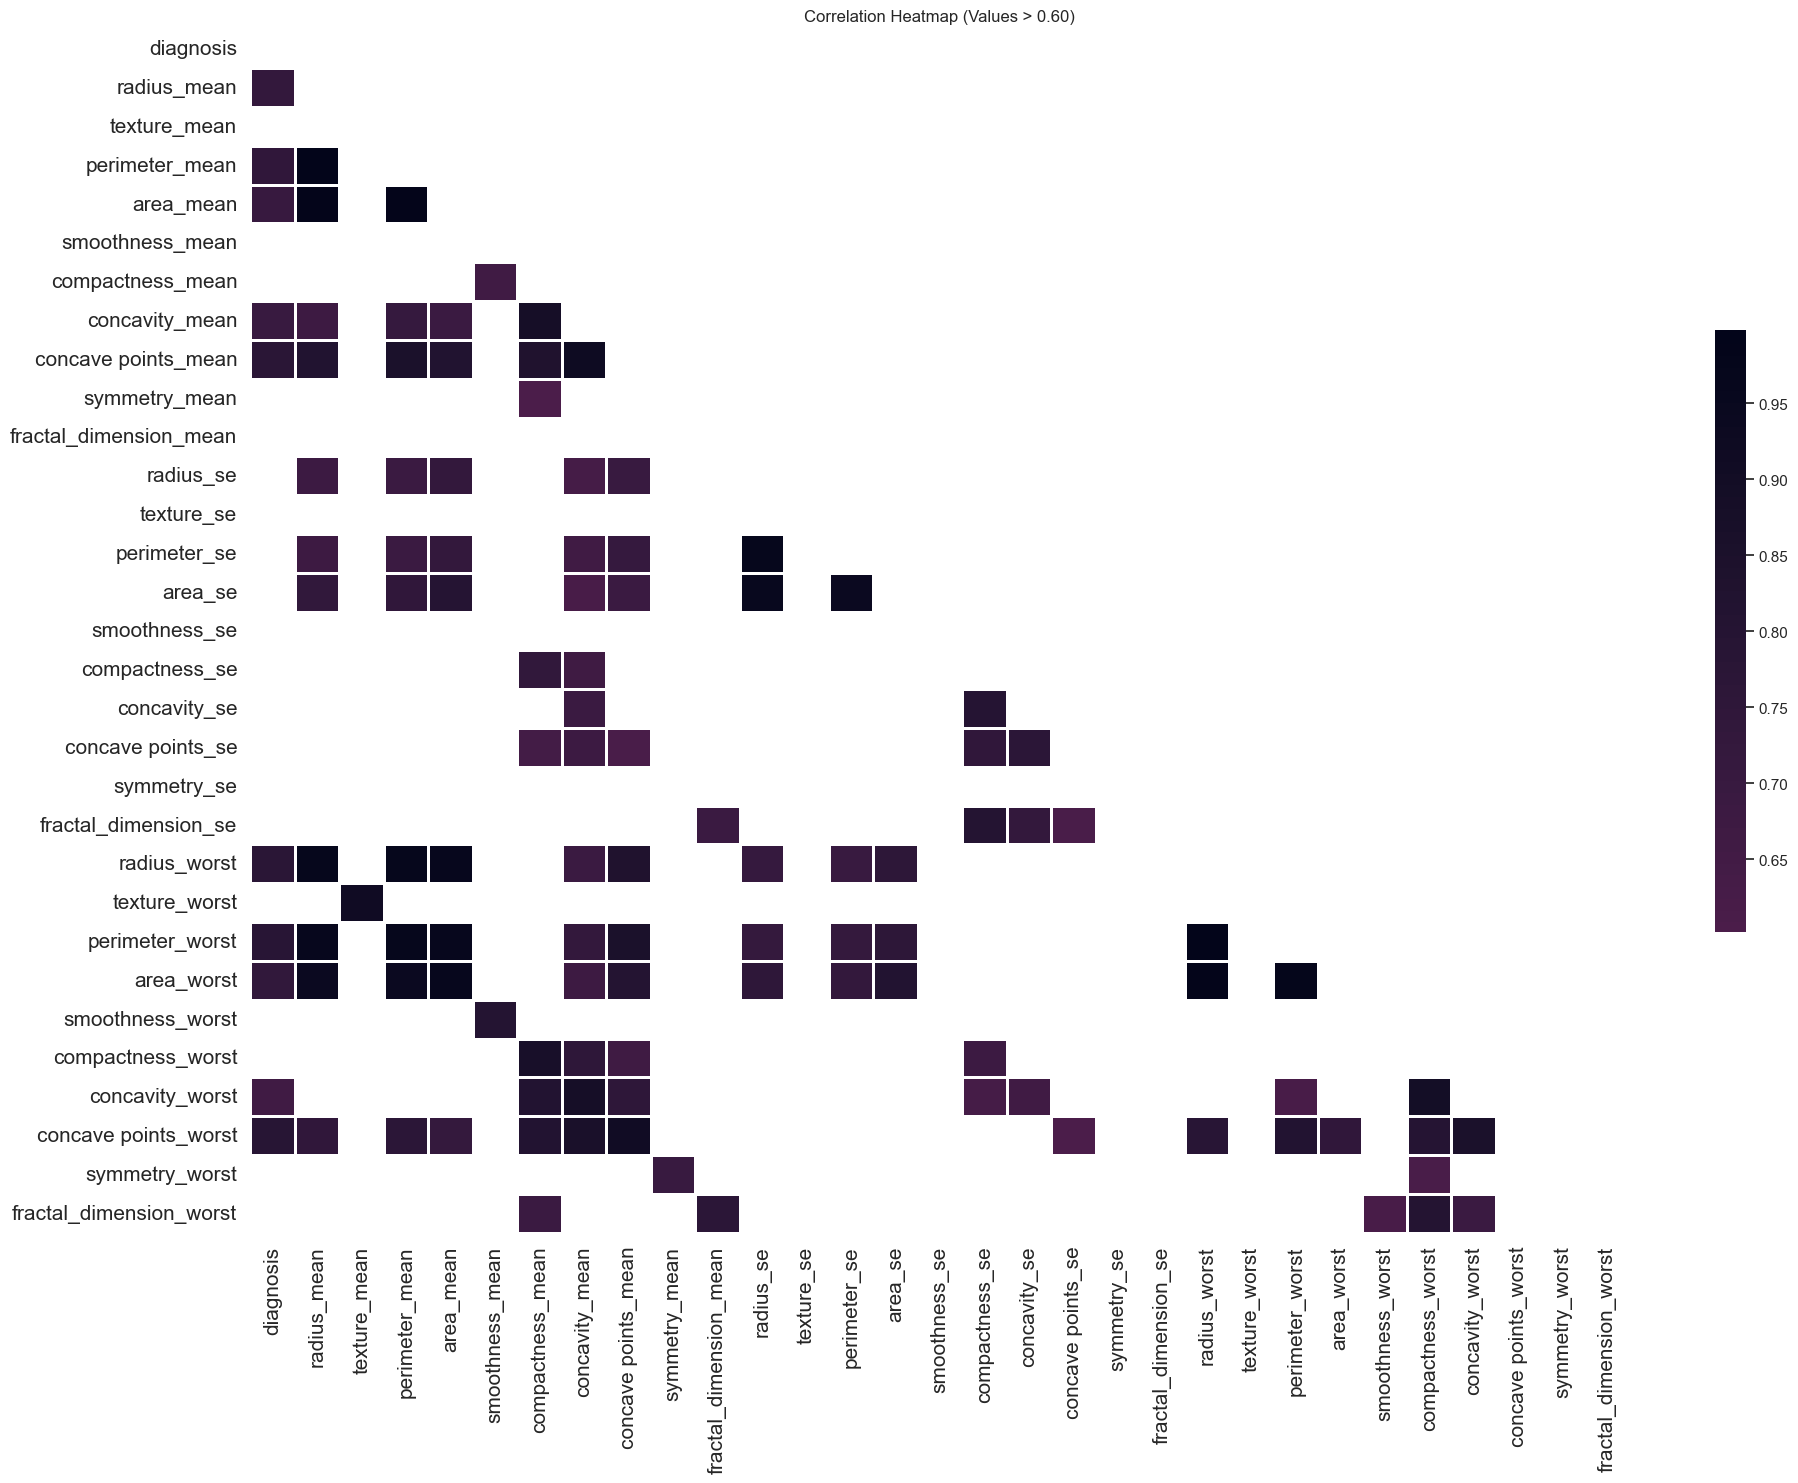

In [61]:
data_filtered =data.select_dtypes(include="number")

corr_matrix =data_filtered.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
filtered_corr = corr_matrix[corr_matrix > 0.60]

plt.figure(figsize=(20, 15))
ax = sns.heatmap(filtered_corr, annot=True, cmap='rocket_r', fmt='.2f',
                 linewidths=1, linecolor='white', mask=mask, center=0, cbar_kws={"shrink": .5})

for label in ax.get_yticklabels():
    label.set_size(15)

for label in ax.get_xticklabels():
    label.set_size(15)


plt.title("Correlation Heatmap (Values > 0.60)")

plt.tight_layout()
plt.show()

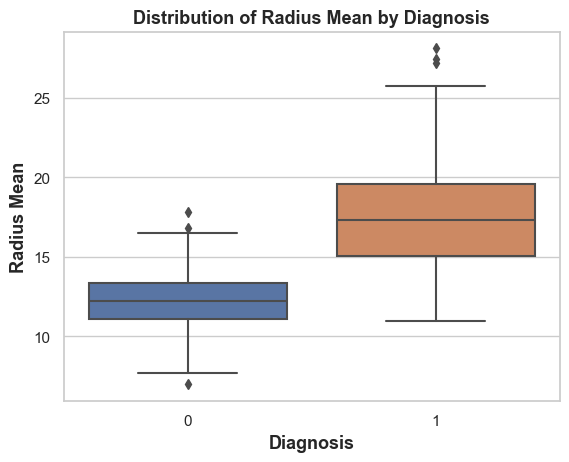

In [14]:
sns.boxplot(x='diagnosis', y='radius_mean', data=data)
plt.title('Distribution of Radius Mean by Diagnosis', fontsize = 13, fontweight = 'bold')
plt.xlabel('Diagnosis', fontsize = 13, fontweight = 'bold')
plt.ylabel('Radius Mean', fontsize = 13, fontweight = 'bold')
plt.show()

In [15]:
# Getting Mean Columns with diagnosis
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Getting SE Columns with diagnosis
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

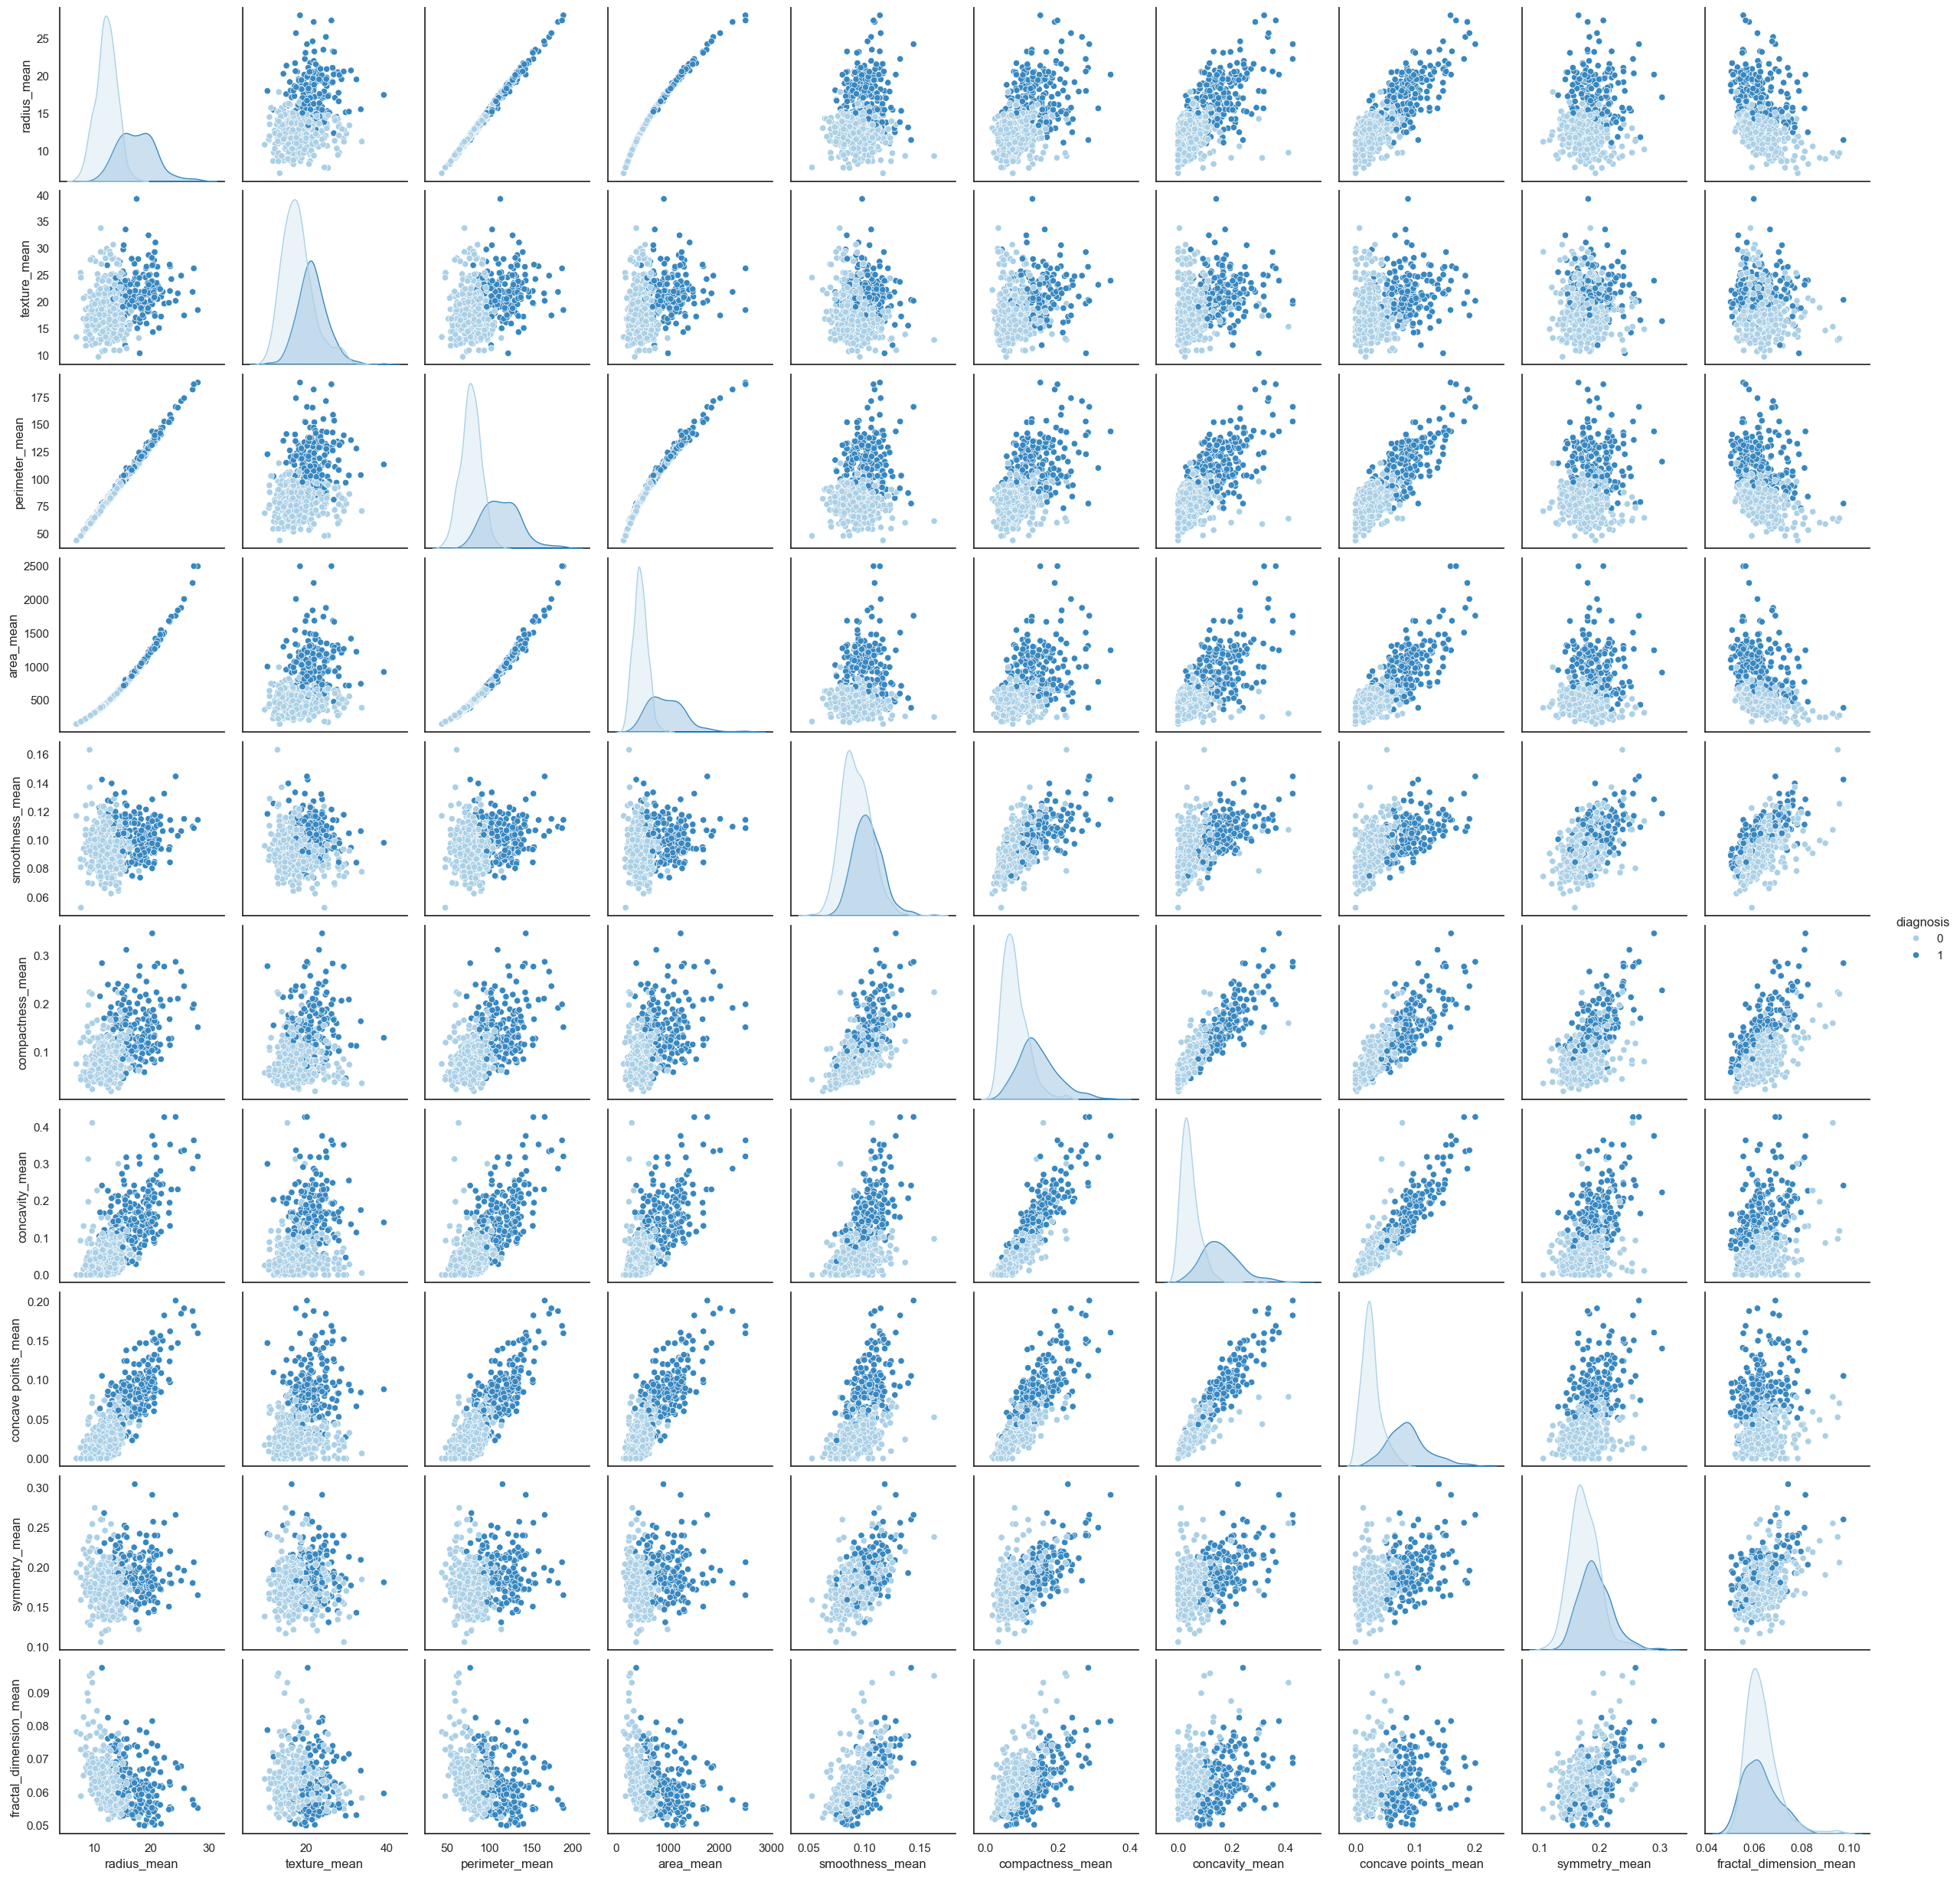

In [22]:
# pairplot for mean columns
sns.pairplot(data[m_col],hue = 'diagnosis', palette='Blues')

In [9]:
list_se=s_col.copy()
list_se.remove('diagnosis')
data_se=data[list_se]

list_mean=m_col.copy()
list_mean.remove('diagnosis')
data_mean=data[list_mean]

NameError: name 's_col' is not defined

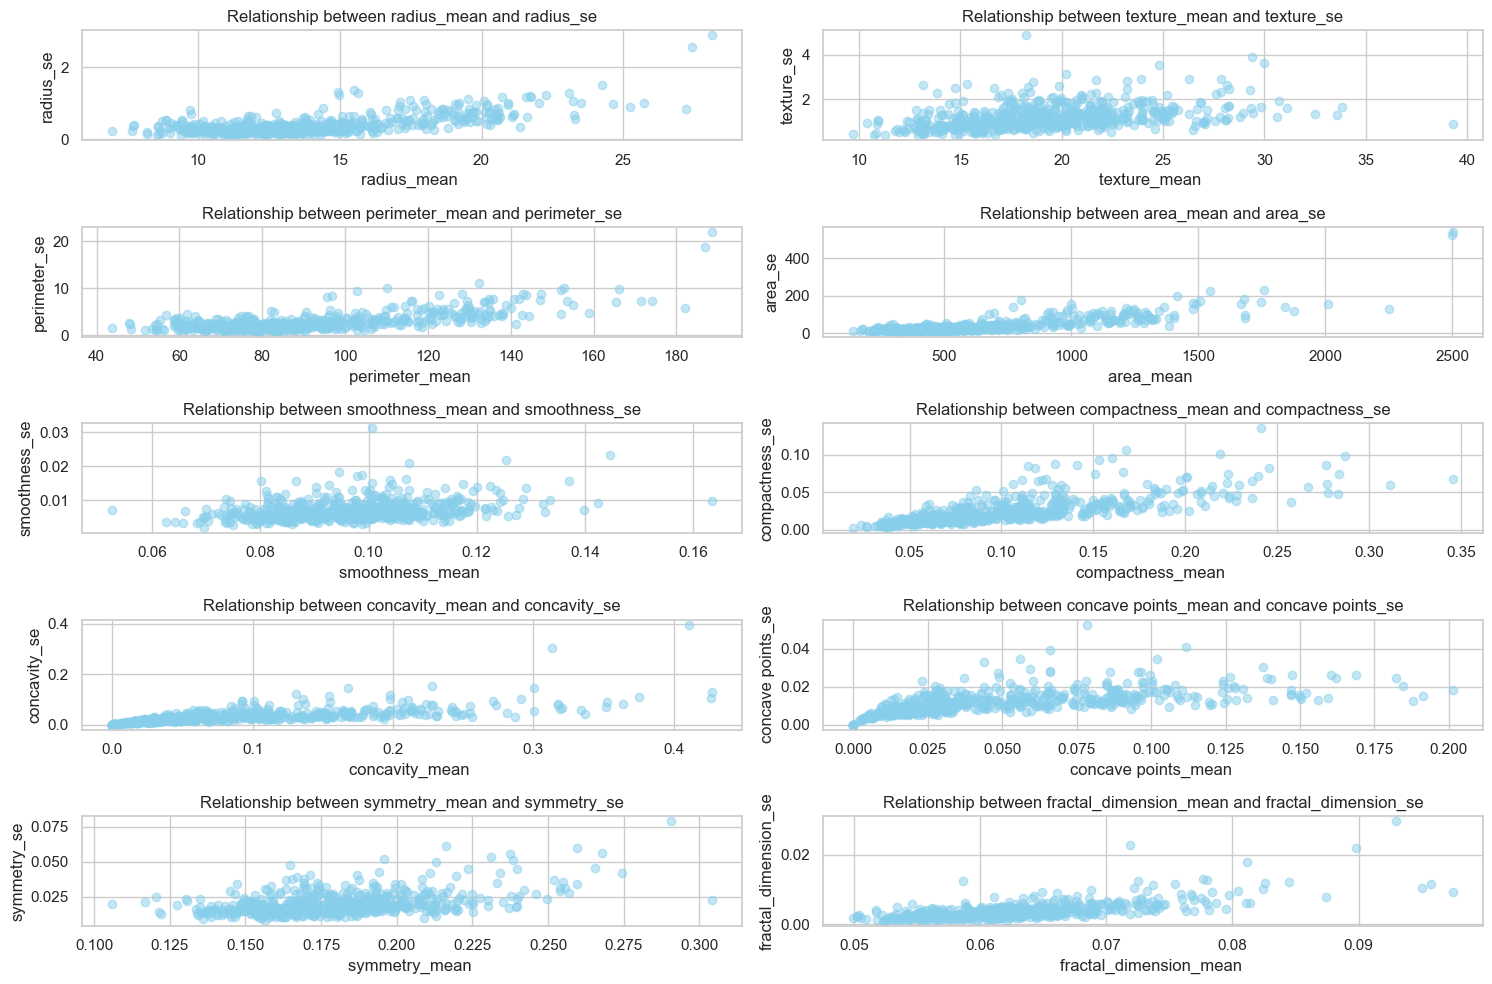

In [18]:
# Relation between Mean Features and their standard eror

num_features = len(data_se.columns)
num_rows = num_features // 2
num_cols = 2 if num_features % 2 == 0 else num_features // 2 + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axs array if it's more than 1D
if num_rows > 1:
    axs = axs.flatten()

# Iterate over each feature in data_se and data_mean
for i, (feature_se, feature_mean) in enumerate(zip(data_se.columns, data_mean.columns)):
    # Create a scatter plot on the current axis
    axs[i].scatter(data_mean[feature_mean], data_se[feature_se], color='skyblue',alpha=0.5)
    axs[i].set_xlabel(f'{feature_mean} ')
    axs[i].set_ylabel(f'{feature_se}')
    axs[i].set_title(f'Relationship between {feature_mean} and {feature_se}')
    axs[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [37]:
x=data.drop('diagnosis',axis=1)
y=data['diagnosis']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

### Data Transformation

In [39]:
scaler=StandardScaler()
x_train=pd.DataFrame(data=scaler.fit_transform(x_train),columns=x.columns)
x_test = pd.DataFrame(data=scaler.transform(x_test), columns=x.columns)

In [40]:
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

In [41]:
def compute_cost(X,y,w,b,*argv):
    #X matrix dau vao 
    #y vector chua cac nhan muc tieu
    

    m,n=X.shape
    loss_sum=0
    for i in range(m):
        # First calculate z_wb = w[0]*X[i][0]+...+w[n-1]*X[i][n-1]+b
        z_wb=0
        for j in range(n):
            z_wb_ij=np.dot(X[i][j],w[j])
            z_wb+=z_wb_ij
        z_wb+=b
        f_wb=sigmoid(z_wb)
        loss=-y[i]*np.log(f_wb)-(1-y[i])*np.log(1-f_wb)
        loss_sum+=loss
    total_cost=(1/m)*loss_sum
    return total_cost


In [42]:
def compute_gradient(X,y,w,b,*argv):
    m,n=X.shape
    # m là số example, n là số tính năng
    dj_dw=np.zeros(w.shape)
    dj_db=0
    for i in range(m):
        f_wb=sigmoid(np.dot(X[i],w)+b)
        dj_db_i=f_wb-y[i]

        dj_db+=dj_db_i

        for j in range(n):
            dj_dw_ij=(f_wb-y[i])*X[i][j]
            dj_dw[j]+=dj_dw_ij
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_db,dj_dw

In [43]:
import math

In [44]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
        # Save cost J at each iteration
        # if i<100000:      # prevent resource exhaustion 
        #     cost =  cost_function(X, y, w_in, b_in, lambda_)
        #     J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}  ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [28]:
initial_w = 0.01 * (np.random.rand(30) - 0.5)
initial_b = -8
X_train=np.array(x_train)
Y_train=np.array(y_train)
w,b, J_history,_ = gradient_descent(X_train ,Y_train, initial_w, initial_b, 
                                   compute_cost,compute_gradient, 0.08, 2000,0)

Iteration    0  
Iteration  200  
Iteration  400  
Iteration  600  
Iteration  800  
Iteration 1000  
Iteration 1200  
Iteration 1400  
Iteration 1600  
Iteration 1800  
Iteration 1999  


In [34]:
def predict(X, w, b): 
    m, n = X.shape   
    p = np.zeros(m)
    for i in range(m):   
        f_wb = sigmoid(np.dot(X[i],w)+b)
        p[i] =f_wb >= 0.5 
    return p

In [35]:
X_test=np.array(x_test)
p = predict(X_test, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_test) * 100))

Train Accuracy: 96.491228


### Cost function for regularlized logistic regression

In [36]:
def compute_cost_reg(X,y,w,b,lambda_):
    m,n=X.shape
    cost_without_reg=compute_cost(X,y,w,b)
    
    reg_cost=0
    for j in range(n):
        reg_cost_j=w[j]**2
        reg_cost+=reg_cost_j
    reg_cost=(lambda_/(2*m))*reg_cost

    total_cost=cost_without_reg+reg_cost

    return total_cost

In [37]:
def compute_gradient_reg(X,y,w,b,lambda_=1):
    m,n=X.shape
    dj_db,dj_dw=compute_gradient(X,y,w,b)

    for j in range(n):
        dj_dw_j_reg=(lambda_/m)*w[j]
        dj_dw[j]+=dj_dw_j_reg

    return dj_db,dj_dw

In [74]:
initial_w = 0.01 * (np.random.rand(30) - 0.5)
initial_b = -8
X_train=np.array(x_train)
Y_train=np.array(y_train)
w,b, J_history,_ = gradient_descent(X_train ,Y_train, initial_w, initial_b, 
                                    compute_cost_reg,compute_gradient_reg, 0.08, 2000,6)

NameError: name 'compute_cost_reg' is not defined

In [39]:
X_test=np.array(x_test)
p = predict(X_test, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_test) * 100))

Train Accuracy: 98.245614


-Elastic Net kết hợp cả L1 và L2, nhờ đó có thể đạt được cả ưu điểm của Ridge và Lasso. Elastic Net rất hữu ích khi dữ liệu có số chiều cao hoặc có tính đa cộng tuyến giữa các đặc trưng.

In [40]:
from sklearn.linear_model import LogisticRegression

# Huấn luyện mô hình hồi quy logistic với Elastic Net regularization
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0)
model.fit(X_train, Y_train)

# Kiểm tra độ chính xác trên tập kiểm tra
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy*100}")

Accuracy: 98.24561403508771


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### This Experience We are going to add momentum

In [45]:
def sgd_with_momentum(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, beta):
    v_w = np.zeros(w_in.shape)
    v_b = 0

    J_history = []
    w_history = []

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)

        # Cập nhật động lượng
        v_w = beta * v_w + (1 - beta) * dj_dw
        v_b = beta * v_b + (1 - beta) * dj_db

        # Cập nhật trọng số và hệ số chặn
        w_in = w_in - alpha * v_w
        b_in = b_in - alpha * v_b

        if i % math.ceil(num_iters / 10) == 0 or i == (num_iters - 1):
            cost = cost_function(X, y, w_in, b_in)
            J_history.append(cost)
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {cost:.4f}, w: {w_in}, b: {b_in}")

    return w_in, b_in, J_history, w_history



In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [47]:
def run_logistic_regression_with_momentum(X_train, Y_train, X_test, Y_test, initial_w, initial_b, compute_cost, compute_gradient, lr, num_epochs, beta):
    # Huấn luyện mô hình với SGD và Momentum
    w, b, J_history, w_history = sgd_with_momentum(X_train, Y_train, initial_w, initial_b, compute_cost, compute_gradient, lr, num_epochs, beta)

    # Dự đoán trên tập huấn luyện
    Y_train_pred = predict_mmt(X_train, w, b)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    train_conf_matrix = confusion_matrix(Y_train, Y_train_pred)
    train_class_report = classification_report(Y_train, Y_train_pred)

    # Hiển thị kết quả trên tập huấn luyện
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print("Confusion Matrix (Train):\n", train_conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix (Train)')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    print("Classification Report (Train):\n", train_class_report)

    # Dự đoán trên tập kiểm tra
    Y_test_pred = predict_mmt(X_test, w, b)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    test_class_report = classification_report(Y_test, Y_test_pred)

    # Hiển thị kết quả trên tập kiểm tra
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("Confusion Matrix (Test):\n", test_conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix (Test)')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    print("Classification Report (Test):\n", test_class_report)

    return w, b, J_history, w_history

In [48]:
def predict_mmt(X, w, b):
    z = np.dot(X, w) + b
    y_pred_probs = sigmoid(z)
    y_pred = (y_pred_probs >= 0.5).astype(int)
    return y_pred

Iteration    0: Cost 0.6912, w: [ 3.52259155e-04  2.00083170e-04  3.57999809e-04  3.40519706e-04
  1.87983736e-04  2.93393992e-04  3.30745306e-04  3.75275238e-04
  1.65113455e-04  2.67720839e-06  2.70218422e-04 -3.22332021e-06
  2.64503301e-04  2.58257801e-04 -2.74074618e-05  1.37849752e-04
  1.10047273e-04  1.94649968e-04  3.11085168e-06  3.40295218e-05
  3.76177341e-04  2.25757402e-04  3.78731158e-04  3.54001373e-04
  2.08811253e-04  2.83992410e-04  3.11117744e-04  3.80388255e-04
  2.06188628e-04  1.57757073e-04], b: -0.00012637362637362635
Iteration  100: Cost 0.2461, w: [ 0.16129343  0.10224384  0.16212495  0.15414366  0.07615947  0.11029417
  0.13240367  0.16293402  0.06285031 -0.02478016  0.11692741 -0.00512783
  0.11045856  0.1105314  -0.01981629  0.0258089   0.01458396  0.06242291
 -0.010702   -0.02071887  0.17498035  0.11955395  0.17340377  0.16221355
  0.09815462  0.11463134  0.12739678  0.16724782  0.09955716  0.05731763], b: -0.09107553248948855
Iteration  200: Cost 0.1842,

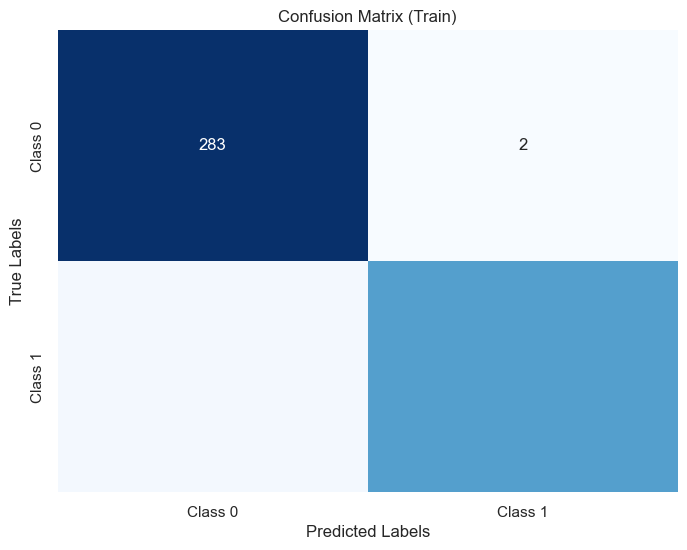

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       285
           1       0.99      0.95      0.97       170

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455

Test Accuracy: 0.9825
Confusion Matrix (Test):
 [[72  0]
 [ 2 40]]


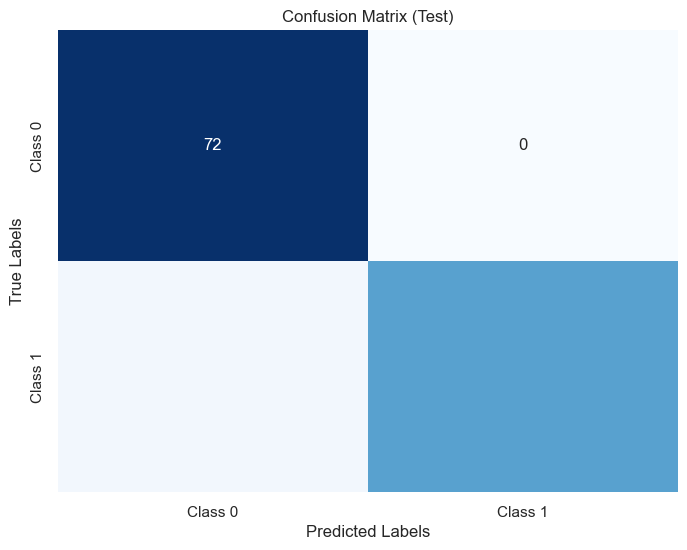

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [49]:

#Các tham số ban đầu
alpha = 0.01    # Tốc độ học
beta = 0.9      # Hệ số động lượng
num_iters = 1000

#Khởi tạo trọng số và hệ số chặn
w_initial = np.zeros((x_train.shape[1],))
b_initial = 0
X_train=np.array(x_train)
Y_train=np.array(y_train)

#Chạy Logistic Regression với Momentum
w_final, b_final, J_history, w_history = run_logistic_regression_with_momentum(X_train, Y_train, x_test, y_test, w_initial, b_initial, compute_cost, compute_gradient, alpha, num_iters, beta)

Thực Nghiệm dưới đây sẽ chạy với 1 seed cố định => Điều này giảm sự biến động cho mô hình giúp ta có ước lượng chính xác hơn về hiệu xuất mô hình

#### First Experience

lr = 0.01 
epoch = 2000
beta = 0 

Iteration    0: Cost 0.6735, w: [ 3.52259155e-03  2.00083170e-03  3.57999809e-03  3.40519706e-03
  1.87983736e-03  2.93393992e-03  3.30745306e-03  3.75275238e-03
  1.65113455e-03  2.67720839e-05  2.70218422e-03 -3.22332021e-05
  2.64503301e-03  2.58257801e-03 -2.74074618e-04  1.37849752e-03
  1.10047273e-03  1.94649968e-03  3.11085168e-05  3.40295218e-04
  3.76177341e-03  2.25757402e-03  3.78731158e-03  3.54001373e-03
  2.08811253e-03  2.83992410e-03  3.11117744e-03  3.80388255e-03
  2.06188628e-03  1.57757073e-03], b: -0.0012637362637362636
Iteration  200: Cost 0.1867, w: [ 0.22116491  0.15376001  0.22092915  0.21169946  0.09847356  0.13013183
  0.16790335  0.21863012  0.07711641 -0.05414389  0.16208905 -0.00607997
  0.14894574  0.15200021 -0.02552427  0.00217441 -0.01156786  0.06347139
 -0.0208587  -0.05980282  0.24378709  0.18298657  0.2391539   0.22564827
  0.14014359  0.14261227  0.16174903  0.22337875  0.14408996  0.06663968], b: -0.15078209737341433
Iteration  400: Cost 0.1419, 

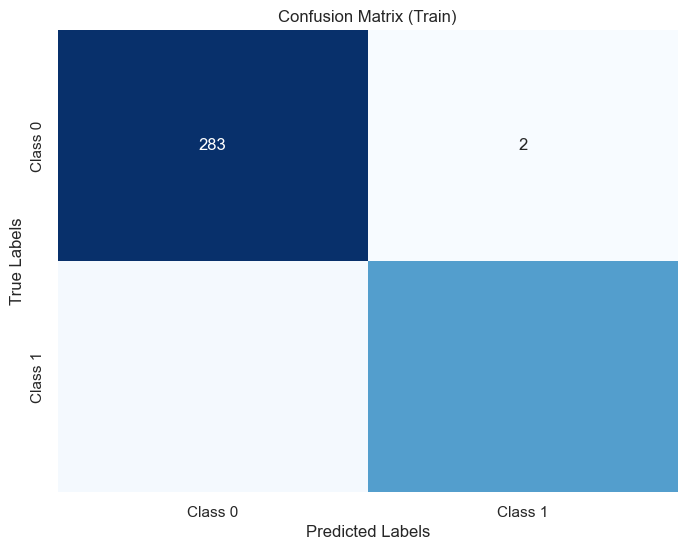

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       285
           1       0.99      0.96      0.97       170

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455

Test Accuracy: 0.9825
Confusion Matrix (Test):
 [[72  0]
 [ 2 40]]


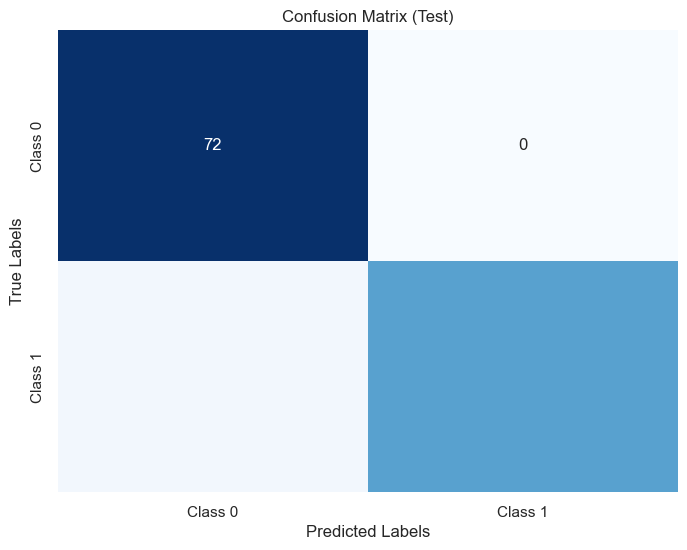

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [50]:
# Các tham số ban đầu
alpha = 0.01    # Tốc độ học
beta = 0    # Hệ số động lượng
num_iters = 2000

# Khởi tạo trọng số và hệ số chặn
w_initial = np.zeros((x_train.shape[1],))
b_initial = 0

X_train=np.array(x_train)
Y_train=np.array(y_train)
# Huấn luyện mô hình với tập huấn luyện
w_final, b_final, J_history, w_history = run_logistic_regression_with_momentum(X_train, Y_train, x_test, y_test, w_initial, b_initial, compute_cost, compute_gradient, alpha, num_iters, beta)

#### Experience 2

lr = 0.01
num_epochs = 2000
beta = 0.5

Iteration    0: Cost 0.6832, w: [ 1.76129577e-03  1.00041585e-03  1.78999904e-03  1.70259853e-03
  9.39918678e-04  1.46696996e-03  1.65372653e-03  1.87637619e-03
  8.25567275e-04  1.33860420e-05  1.35109211e-03 -1.61166010e-05
  1.32251650e-03  1.29128901e-03 -1.37037309e-04  6.89248762e-04
  5.50236366e-04  9.73249838e-04  1.55542584e-05  1.70147609e-04
  1.88088670e-03  1.12878701e-03  1.89365579e-03  1.77000686e-03
  1.04405626e-03  1.41996205e-03  1.55558872e-03  1.90194128e-03
  1.03094314e-03  7.88785367e-04], b: -0.0006318681318681318
Iteration  200: Cost 0.1865, w: [ 0.22167932  0.15389775  0.22145877  0.21221975  0.09866881  0.13061796
  0.16831723  0.21908468  0.07730928 -0.05414891  0.16242365 -0.00613047
  0.14933971  0.1524223  -0.02572283  0.00247376 -0.01140436  0.06367492
 -0.0208923  -0.05975846  0.24426808  0.18308181  0.23966374  0.22614389
  0.14022512  0.14298784  0.16207764  0.22380135  0.14414388  0.06671441], b: -0.1504406609799602
Iteration  400: Cost 0.1417, w

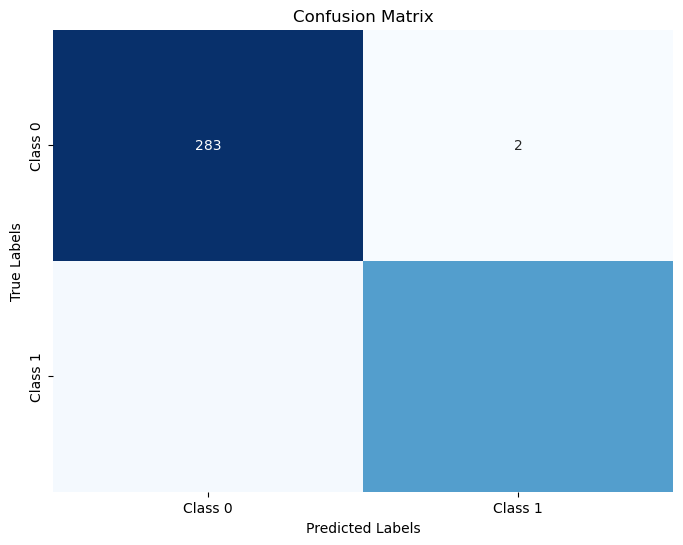

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       285
           1       0.99      0.96      0.97       170

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [ ]:
# Các tham số ban đầu
alpha = 0.01    # Tốc độ học
beta = 0.5    # Hệ số động lượng
num_iters = 2000

# Khởi tạo trọng số và hệ số chặn
w_initial = np.zeros((x_train.shape[1],))
b_initial = 0

X_train=np.array(x_train)
Y_train=np.array(y_train)
# Huấn luyện mô hình với tập huấn luyện
w_final, b_final, J_history, w_history = run_logistic_regression_with_momentum(X_train, Y_train, x_test, y_test, w_initial, b_initial, compute_cost, compute_gradient, alpha, num_iters, beta)

#### Experience 3

lr = 0.01  num_epochs = 2000  beta = 0.7

Iteration    0: Cost 0.6872, w: [ 1.05677746e-03  6.00249510e-04  1.07399943e-03  1.02155912e-03
  5.63951207e-04  8.80181976e-04  9.92235919e-04  1.12582571e-03
  4.95340365e-04  8.03162518e-06  8.10655266e-04 -9.66996063e-06
  7.93509902e-04  7.74773404e-04 -8.22223855e-05  4.13549257e-04
  3.30141819e-04  5.83949903e-04  9.33255504e-06  1.02088565e-04
  1.12853202e-03  6.77272206e-04  1.13619347e-03  1.06200412e-03
  6.26433758e-04  8.51977230e-04  9.33353231e-04  1.14116477e-03
  6.18565885e-04  4.73271220e-04], b: -0.00037912087912087916
Iteration  200: Cost 0.1861, w: [ 0.22238171  0.154088    0.22218142  0.21292597  0.09893619  0.13128061
  0.16888309  0.21970744  0.07757307 -0.05415606  0.16287707 -0.00619992
  0.14987141  0.15298697 -0.02599307  0.00288312 -0.0111767   0.06396298
 -0.02093909 -0.05969223  0.24492649  0.18321604  0.24036025  0.22681721
  0.14034064  0.14350318  0.162532    0.22438486  0.14422356  0.06682301], b: -0.1499896450383107
Iteration  400: Cost 0.1415, 

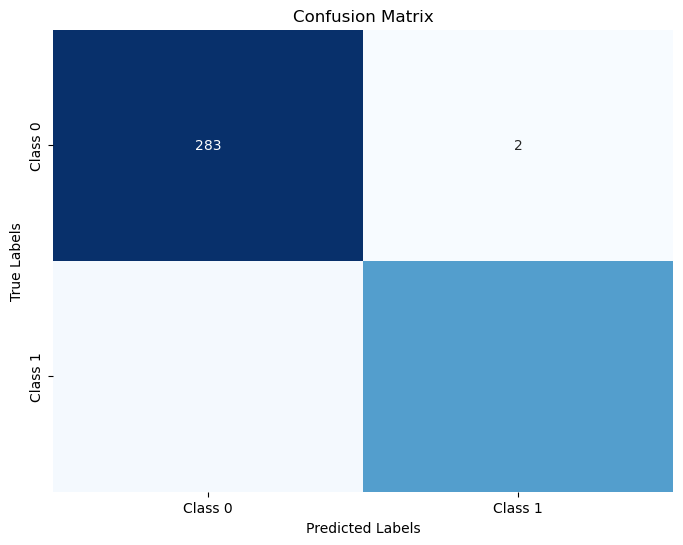

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       285
           1       0.99      0.96      0.97       170

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [ ]:
# Các tham số ban đầu
alpha = 0.01    # Tốc độ học
beta = 0.7    # Hệ số động lượng
num_iters = 2000

# Khởi tạo trọng số và hệ số chặn
w_initial = np.zeros((x_train.shape[1],))
b_initial = 0

X_train=np.array(x_train)
Y_train=np.array(y_train)
# Huấn luyện mô hình với tập huấn luyện
w_final, b_final, J_history, w_history = run_logistic_regression_with_momentum(X_train, Y_train, x_test, y_test, w_initial, b_initial, compute_cost, compute_gradient, alpha, num_iters, beta)

#### Experience 4

lr = 0.1 num_epochs = 2000 beta = 0.9

Iteration    0: Cost 0.5243, w: [ 0.03522592  0.02000832  0.03579998  0.03405197  0.01879837  0.0293394
  0.03307453  0.03752752  0.01651135  0.00026772  0.02702184 -0.00032233
  0.02645033  0.02582578 -0.00274075  0.01378498  0.01100473  0.019465
  0.00031109  0.00340295  0.03761773  0.02257574  0.03787312  0.03540014
  0.02088113  0.02839924  0.03111177  0.03803883  0.02061886  0.01577571], b: -0.012637362637362638
Iteration  200: Cost 0.0853, w: [ 0.45991752  0.47501181  0.45141324  0.45491059  0.21218691  0.12474865
  0.34191786  0.47442577  0.10862178 -0.20438504  0.4458857   0.00671908
  0.36265673  0.3886643   0.01973683 -0.20184933 -0.10431627  0.0950304
 -0.08054442 -0.26367609  0.56184872  0.59617661  0.53003149  0.52972039
  0.37850787  0.1917652   0.33587034  0.46995493  0.40434336  0.09150834], b: -0.37468628124014364
Iteration  400: Cost 0.0727, w: [ 0.51848666  0.5961754   0.505616    0.5205801   0.2669814   0.06709826
  0.42168125  0.57305846  0.0893996  -0.26038937  0.

C:\Users\Dell\AppData\Local\Temp\ipykernel_20020\1335362308.py:16: RuntimeWarning: divide by zero encountered in log
  loss=-y[i]*np.log(f_wb)-(1-y[i])*np.log(1-f_wb)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20020\1335362308.py:16: RuntimeWarning: invalid value encountered in scalar multiply
  loss=-y[i]*np.log(f_wb)-(1-y[i])*np.log(1-f_wb)


Iteration  600: Cost nan, w: [ 0.54259635  0.65789747  0.52686282  0.55144518  0.30590329  0.01233211
  0.47967851  0.63876007  0.06654951 -0.29001229  0.70705612 -0.04768067
  0.53100174  0.5729017   0.08814189 -0.44292956 -0.09471652  0.1780894
 -0.14690271 -0.42818796  0.74398889  0.90145819  0.67863912  0.70843056
  0.55126159  0.13017464  0.50825613  0.62270649  0.63723861  0.08208938], b: -0.41053892005776343
Iteration  800: Cost nan, w: [ 0.55256331  0.69408247  0.53470167  0.56802758  0.33536828 -0.03899973
  0.52691934  0.6893702   0.04348062 -0.30680184  0.79908523 -0.08035958
  0.58618101  0.63414195  0.11119672 -0.53272697 -0.0789552   0.21457901
 -0.16851217 -0.48436214  0.79369463  0.99095913  0.71498009  0.75874807
  0.59790651  0.09627012  0.5726002   0.66739626  0.71874231  0.07456208], b: -0.40392108741886257
Iteration 1000: Cost nan, w: [ 0.55513302  0.71655938  0.53559076  0.57709046  0.35826407 -0.08727865
  0.56741023  0.73110613  0.02080993 -0.31574243  0.8784223

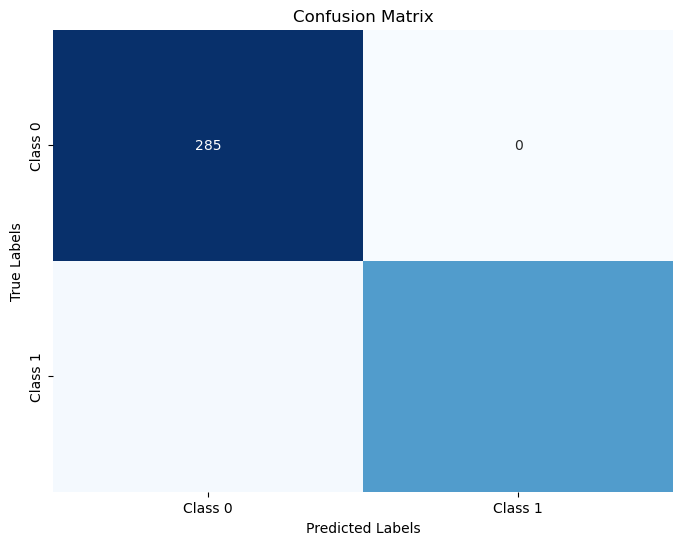

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       285
           1       1.00      0.97      0.99       170

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



In [ ]:
# Các tham số ban đầu
alpha = 0.1    # Tốc độ học
beta = 0   # Hệ số động lượng
num_iters = 2000

# Khởi tạo trọng số và hệ số chặn
w_initial = np.zeros((x_train.shape[1],))
b_initial = 0

X_train=np.array(x_train)
Y_train=np.array(y_train)
# Huấn luyện mô hình với tập huấn luyện
w_final, b_final, J_history, w_history = run_logistic_regression_with_momentum(X_train, Y_train, x_test, y_test, w_initial, b_initial, compute_cost, compute_gradient, alpha, num_iters, beta)

Iteration    0: Cost 0.6929, w: [ 3.52259155e-05  2.00083170e-05  3.57999809e-05  3.40519706e-05
  1.87983736e-05  2.93393992e-05  3.30745306e-05  3.75275238e-05
  1.65113455e-05  2.67720839e-07  2.70218422e-05 -3.22332021e-07
  2.64503301e-05  2.58257801e-05 -2.74074618e-06  1.37849752e-05
  1.10047273e-05  1.94649968e-05  3.11085168e-07  3.40295218e-06
  3.76177341e-05  2.25757402e-05  3.78731158e-05  3.54001373e-05
  2.08811253e-05  2.83992410e-05  3.11117744e-05  3.80388255e-05
  2.06188628e-05  1.57757073e-05], b: -1.2637362637362635e-05
Iteration  200: Cost 0.4605, w: [ 0.05337998  0.03150282  0.05404634  0.05118882  0.02755749  0.04212094
  0.04817946  0.05597698  0.02376114 -0.00221327  0.03966302 -0.0011152
  0.03835283  0.03754183 -0.00529079  0.01719943  0.01328627  0.02709446
 -0.00113935  0.00170235  0.05732733  0.03607481  0.05739792  0.05346053
  0.03219713  0.0418408   0.04603445  0.05736256  0.03204559  0.02283793], b: -0.023429460646519486
Iteration  400: Cost 0.3627,

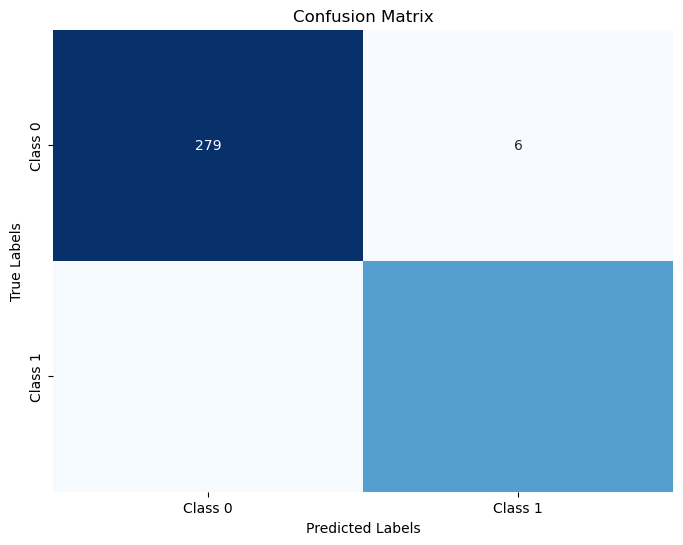

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       285
           1       0.96      0.95      0.96       170

    accuracy                           0.97       455
   macro avg       0.97      0.96      0.96       455
weighted avg       0.97      0.97      0.97       455



In [ ]:
# Các tham số ban đầu
alpha = 0.001    # Tốc độ học
beta = 0.9    # Hệ số động lượng
num_iters = 2000

# Khởi tạo trọng số và hệ số chặn
w_initial = np.zeros((x_train.shape[1],))
b_initial = 0

X_train=np.array(x_train)
Y_train=np.array(y_train)
# Huấn luyện mô hình với tập huấn luyện
w_final, b_final, J_history, w_history = run_logistic_regression_with_momentum(X_train, Y_train, x_test, y_test, w_initial, b_initial, compute_cost, compute_gradient, alpha, num_iters, beta)

#### CELL này dùng để đánh giá tổng quan và nhận xét

Mô hình với beta = 0.5 hoạt động tốt nhất với độ chính xác 81%. Cả precision và recall cho cả hai lớp đều ở mức cao, cho thấy mô hình đã học tốt và có khả năng phân loại chính xác giữa hai lớp.

Tuy nhiên độ chính xác giảm xuống 76% ở mô hình có beta = 0.7 so với thí nghiệm trước, cho thấy việc tăng beta có thể làm giảm khả năng tổng quát của mô hình, mặc dù cả precision và recall đều hợp lý cho cả hai lớp.

Mô hình với beta = 0.9 có độ chính xác 77%. Mặc dù cost thấp hơn so với thí nghiệm 3, độ chính xác không cải thiện rõ ràng. Precision cho lớp 0 vẫn tốt nhưng recall cho lớp 1 giảm, cho thấy có sự bất cân bằng trong việc phân loại giữa các lớp.

Ảnh Hưởng của Hệ Số Beta

Beta thấp (0): Mô hình có thể học từ dữ liệu nhưng không ổn định, dẫn đến việc dự đoán không chính xác hơn.

Beta vừa (0.5): Mô hình ổn định hơn và có khả năng phân loại tốt, đạt độ chính xác tối ưu.

Beta cao (0.7 và 0.9): Mô hình bắt đầu có dấu hiệu giảm hiệu suất, cho thấy rằng tăng beta không phải lúc nào cũng tốt cho việc cải thiện mô hình.



